# **BoE Employer Project** - Analysing Economic Indicators & Sentiment Scores

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import scipy.stats

from statsmodels.formula.api import ols
from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')


## **Economic Indicators**

### Household Savings Ratio

In [5]:
# Importing the Household Savings Ratio excel file

hsr = pd.read_excel('Household Savings Ratio.xlsx') 

# Print the output.
print(hsr.info())
hsr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Figure 1: The household saving ratio peaked at 27.4% during the coronavirus (COVID-19) pandemic  248 non-null    object
 1   Unnamed: 1                                                                                       247 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB
None


,Figure 1: The household saving ratio peaked at 27.4% during the coronavirus (COVID-19) pandemic,Unnamed: 1
0,"The household saving ratio (%), UK, Quarter 1 ...",NaN
1,NaN,NaN
2,Notes,NaN
3,Unit,%
4,NaN,NaN


In [6]:
# Renaming the columns
# Create a list of new column names
new_column_names = ['Year / Quarter', 'Savings Ratio (%)']

# Rename the columns
hsr.columns = new_column_names

# Display the updated dataframe with new column names
hsr.head()

,Year / Quarter,Savings Ratio (%)
0,"The household saving ratio (%), UK, Quarter 1 ...",NaN
1,NaN,NaN
2,Notes,NaN
3,Unit,%
4,NaN,NaN


In [7]:
# Taking a subset of the data
hsr_filtered = hsr[(hsr['Year / Quarter'] >= '1998 Q3') & (hsr['Year / Quarter'] <= '2022 Q4')].copy()

# Reset the index of the filtered dataframe and drop the old index
hsr_filtered.reset_index(drop=True, inplace=True)

hsr_filtered.head()

,Year / Quarter,Savings Ratio (%)
0,1998 Q3,5.2
1,1998 Q4,5.1
2,1999 Q1,2.9
3,1999 Q2,5.2
4,1999 Q3,4.8


In [8]:
hsr_filtered.tail()

,Year / Quarter,Savings Ratio (%)
93,2021 Q4,7.4
94,2022 Q1,7.9
95,2022 Q2,6.6
96,2022 Q3,8.3
97,2022 Q4,9.1


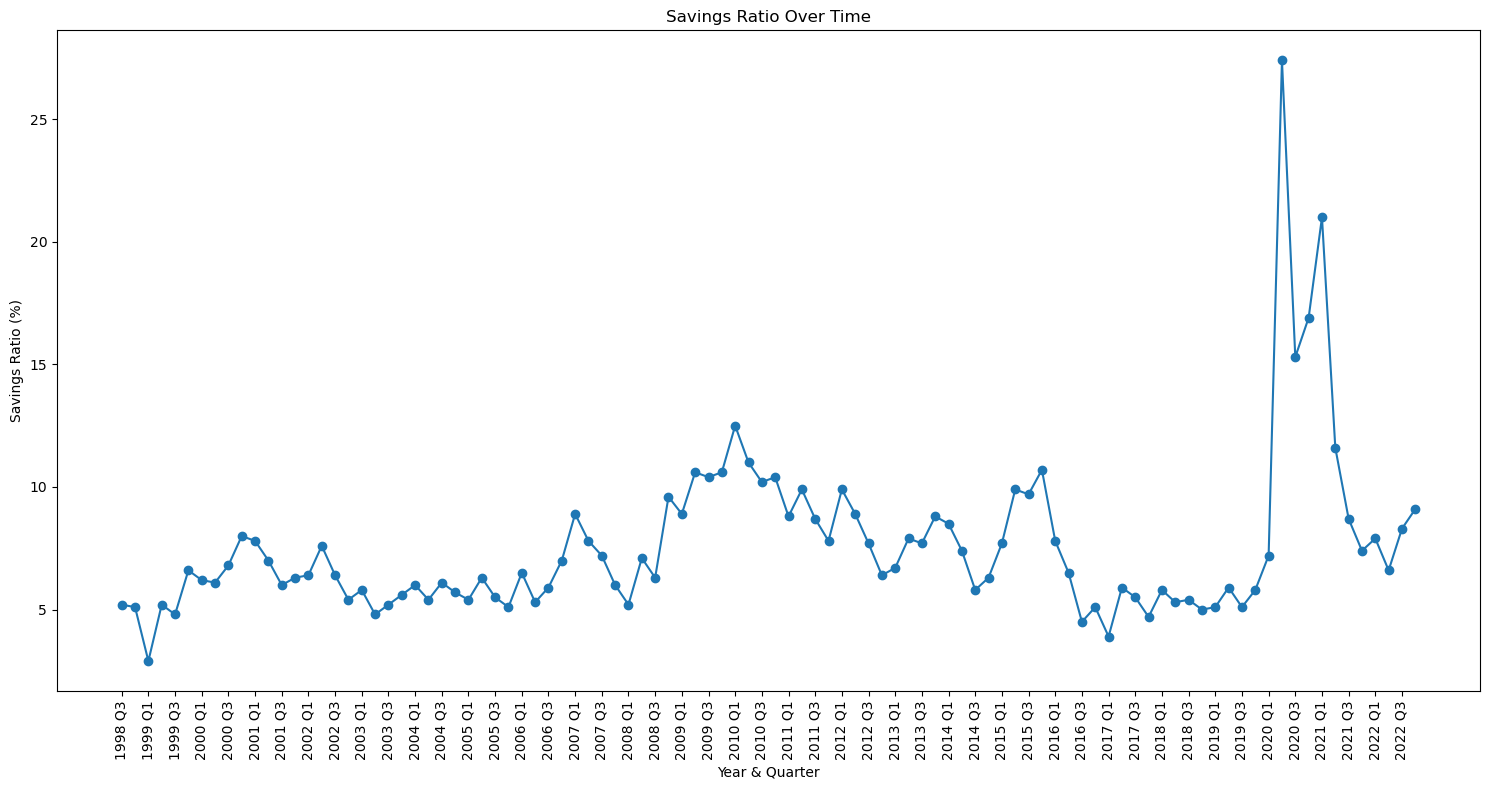

In [9]:
# Create a line plot
plt.figure(figsize=(15,8))
plt.plot(hsr_filtered['Year / Quarter'], hsr_filtered['Savings Ratio (%)'], marker='o')
plt.title('Savings Ratio Over Time')
plt.xlabel('Year & Quarter')
plt.ylabel('Savings Ratio (%)')
plt.xticks(hsr_filtered['Year / Quarter'][::2], rotation=90) 
plt.grid(False)
plt.tight_layout()
plt.show()

- At the start of the credit crunch and recession of 2008-10, the saving ratio rose rapidly as consumers became more risk averse and wanted to pay off debts and increase savings.
  
- UK household saving rates fell to record lows in 2016 because wage growth stalled and prices rose. Prices witnessed an uptick on the back of depreciation in the Pound following the Brexit vote in 2016 which made imported goods more expensive.
  
- 2020/21 saw a spike in the savings ratio due to the unusual circumstances of the Covid Pandemic. With normal economic activity curtailed many households were unable to spend on usual items like holidays, leisure and going out. Therefore, household savings rose sharply. With the end of covid lockdowns, the savings ratio fell. 

### Wage Growth Rate

In [12]:
# Importing the Wage Growth Rate excel file

wgr = pd.read_excel('Wage Growth Rate Actuals.xlsx') 

# Print the output.
print(wgr.info())
wgr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Month                                          284 non-null    datetime64[ns]
 1   Weekly Total Pay (GBP)                         284 non-null    float64       
 2   % Change in Weekly Total Pay (Year on Year)    284 non-null    float64       
 3   Weekly Regular Pay (GBP)                       284 non-null    float64       
 4   % Change in Weekly Regular Pay (Year on Year)  284 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.2 KB
None


,Month,Weekly Total Pay (GBP),% Change in Weekly Total Pay (Year on Year),Weekly Regular Pay (GBP),% Change in Weekly Regular Pay (Year on Year)
0,2001-01-01,321.307353,5.442043,303.907985,3.577780
1,2001-02-01,324.821972,8.343069,304.054895,3.653054
2,2001-03-01,326.070496,4.705510,305.970365,4.526003
3,2001-04-01,326.484053,5.748468,308.596937,5.334372
4,2001-05-01,326.628267,4.964916,308.865180,4.896122


In [13]:
#Cleaning and formating the data
# Changing the date format to improve readability
# Convert the 'Month' column to datetime format
wgr['Month'] = pd.to_datetime(wgr['Month'])

wgr['Month'] = wgr['Month'].dt.strftime('%b %Y')
wgr.head()

,Month,Weekly Total Pay (GBP),% Change in Weekly Total Pay (Year on Year),Weekly Regular Pay (GBP),% Change in Weekly Regular Pay (Year on Year)
0,Jan 2001,321.307353,5.442043,303.907985,3.577780
1,Feb 2001,324.821972,8.343069,304.054895,3.653054
2,Mar 2001,326.070496,4.705510,305.970365,4.526003
3,Apr 2001,326.484053,5.748468,308.596937,5.334372
4,May 2001,326.628267,4.964916,308.865180,4.896122


In [14]:
# Creating two new columns for month on month change in weekly total pay and month on month change in weekly regular pay
wgr['% change in Weekly Total Pay (Month on Month)'] = wgr['Weekly Total Pay (GBP)'].pct_change() * 100
wgr['% change in Weekly Regular Pay (Month on Month)'] = wgr['Weekly Regular Pay (GBP)'].pct_change() * 100

# round the data to two decimal places
wgr = wgr.round(2)
wgr.head()

,Month,Weekly Total Pay (GBP),% Change in Weekly Total Pay (Year on Year),Weekly Regular Pay (GBP),% Change in Weekly Regular Pay (Year on Year),% change in Weekly Total Pay (Month on Month),% change in Weekly Regular Pay (Month on Month)
0,Jan 2001,321.31,5.44,303.91,3.58,NaN,NaN
1,Feb 2001,324.82,8.34,304.05,3.65,1.09,0.05
2,Mar 2001,326.07,4.71,305.97,4.53,0.38,0.63
3,Apr 2001,326.48,5.75,308.60,5.33,0.13,0.86
4,May 2001,326.63,4.96,308.87,4.90,0.04,0.09


In [15]:
# Ensure the 'Month' column is in datetime format
wgr['Month'] = pd.to_datetime(wgr['Month'])

# Create a copy of the dataframe filtered by the desired date range
wgr_filtered = wgr[(wgr['Month'] >= '1998-07-01') & (wgr['Month'] <= '2022-12-31')].copy()

# Convert the Month data into a format that improves readability
wgr_filtered['Month'] = wgr_filtered['Month'].dt.strftime('%b %Y')

# Display the filtered dataframe
wgr_filtered.head()

,Month,Weekly Total Pay (GBP),% Change in Weekly Total Pay (Year on Year),Weekly Regular Pay (GBP),% Change in Weekly Regular Pay (Year on Year),% change in Weekly Total Pay (Month on Month),% change in Weekly Regular Pay (Month on Month)
0,Jan 2001,321.31,5.44,303.91,3.58,NaN,NaN
1,Feb 2001,324.82,8.34,304.05,3.65,1.09,0.05
2,Mar 2001,326.07,4.71,305.97,4.53,0.38,0.63
3,Apr 2001,326.48,5.75,308.60,5.33,0.13,0.86
4,May 2001,326.63,4.96,308.87,4.90,0.04,0.09


In [16]:
wgr_filtered.tail()

,Month,Weekly Total Pay (GBP),% Change in Weekly Total Pay (Year on Year),Weekly Regular Pay (GBP),% Change in Weekly Regular Pay (Year on Year),% change in Weekly Total Pay (Month on Month),% change in Weekly Regular Pay (Month on Month)
259,Aug 2022,619.38,6.08,574.64,5.70,0.82,0.47
260,Sep 2022,620.87,6.02,577.71,6.04,0.24,0.53
261,Oct 2022,626.69,6.57,583.15,6.57,0.94,0.94
262,Nov 2022,630.71,7.37,587.22,6.90,0.64,0.70
263,Dec 2022,633.39,4.99,589.56,6.65,0.43,0.40


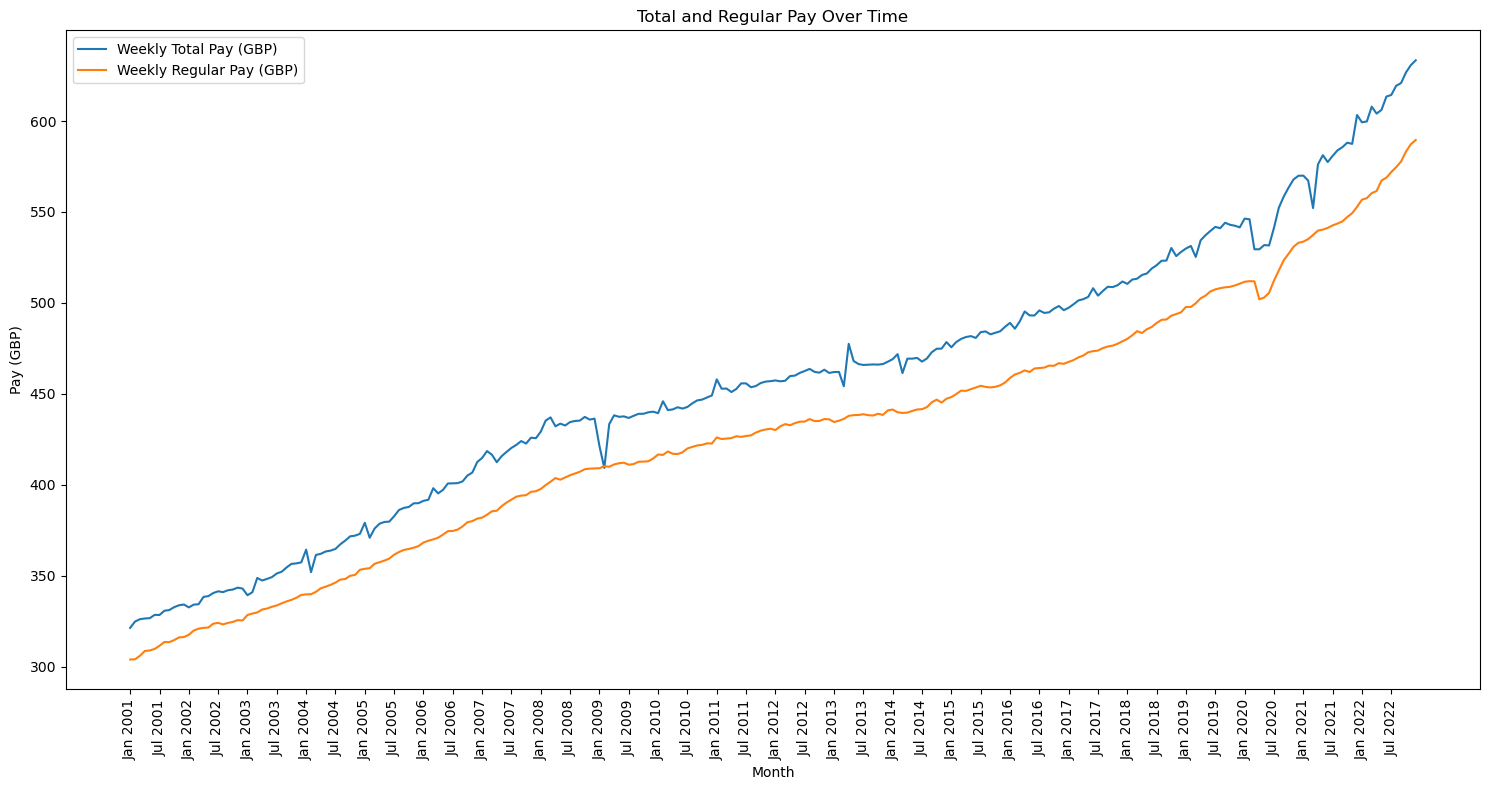

In [17]:
# Creating a line plot for Weekly Total Pay and Weekly Regular Pay

plt.figure(figsize=(15,8))

#Plotting weekly total pay and weekly regular pay
plt.plot(wgr_filtered['Month'], wgr_filtered['Weekly Total Pay (GBP)'])
plt.plot(wgr_filtered['Month'], wgr_filtered['Weekly Regular Pay (GBP)'])

plt.title('Total and Regular Pay Over Time')
plt.xlabel('Month')
plt.ylabel('Pay (GBP)')
plt.xticks(wgr_filtered['Month'][::6], rotation=90)
plt.legend(['Weekly Total Pay (GBP)', 'Weekly Regular Pay (GBP)'], loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()

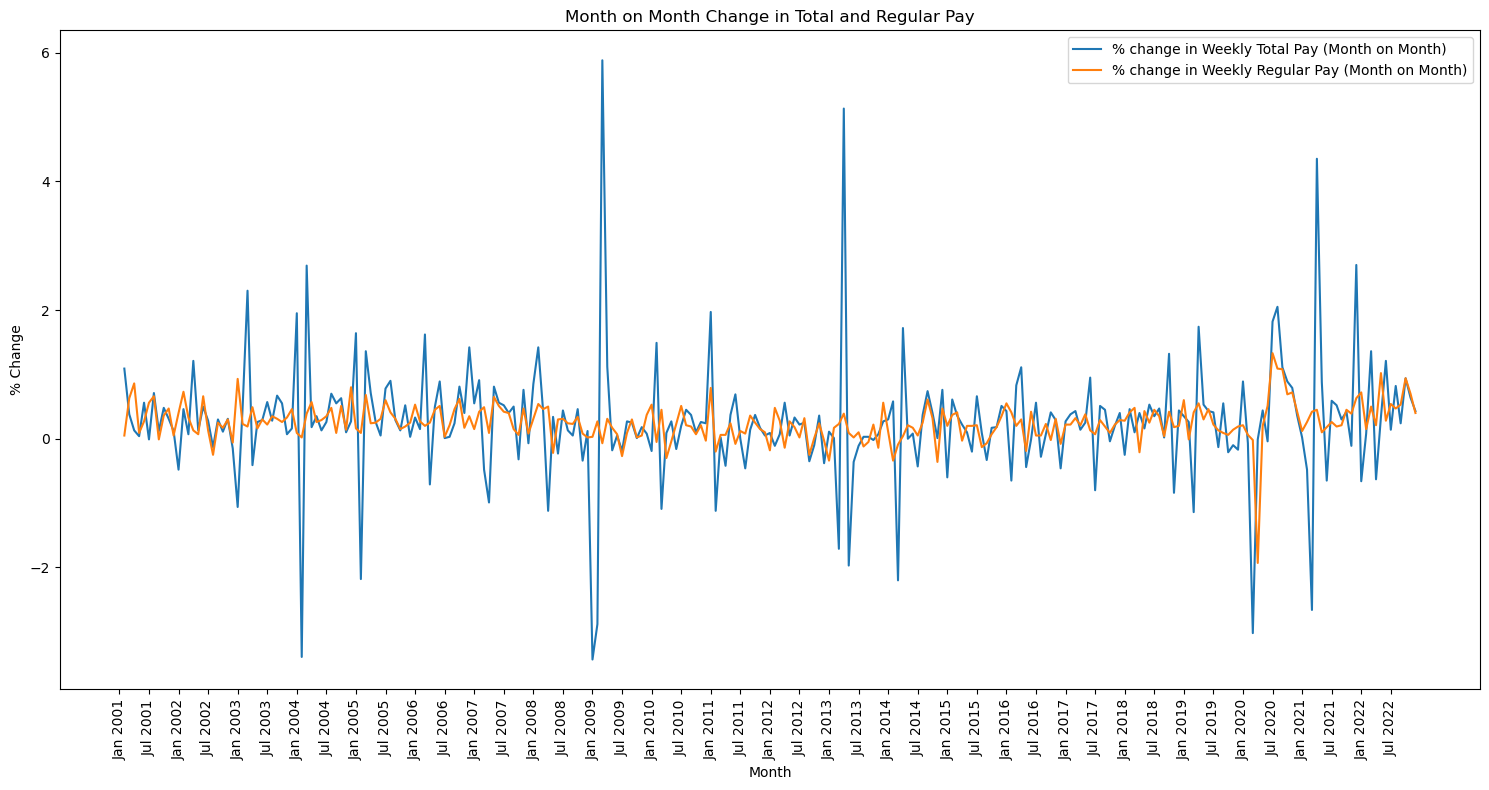

In [18]:
# Creating a line plot for % change in Weekly Total Pay (month on month) and 
# % change in Weekly Regular Pay (month on month)

plt.figure(figsize=(15,8))

#Plotting weekly total pay and weekly regular pay
plt.plot(wgr_filtered['Month'], wgr_filtered['% change in Weekly Total Pay (Month on Month)'])
plt.plot(wgr_filtered['Month'], wgr_filtered['% change in Weekly Regular Pay (Month on Month)'])

plt.title('Month on Month Change in Total and Regular Pay')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.xticks(wgr_filtered['Month'][::6], rotation=90)
plt.legend(['% change in Weekly Total Pay (Month on Month)', '% change in Weekly Regular Pay (Month on Month)'], loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()

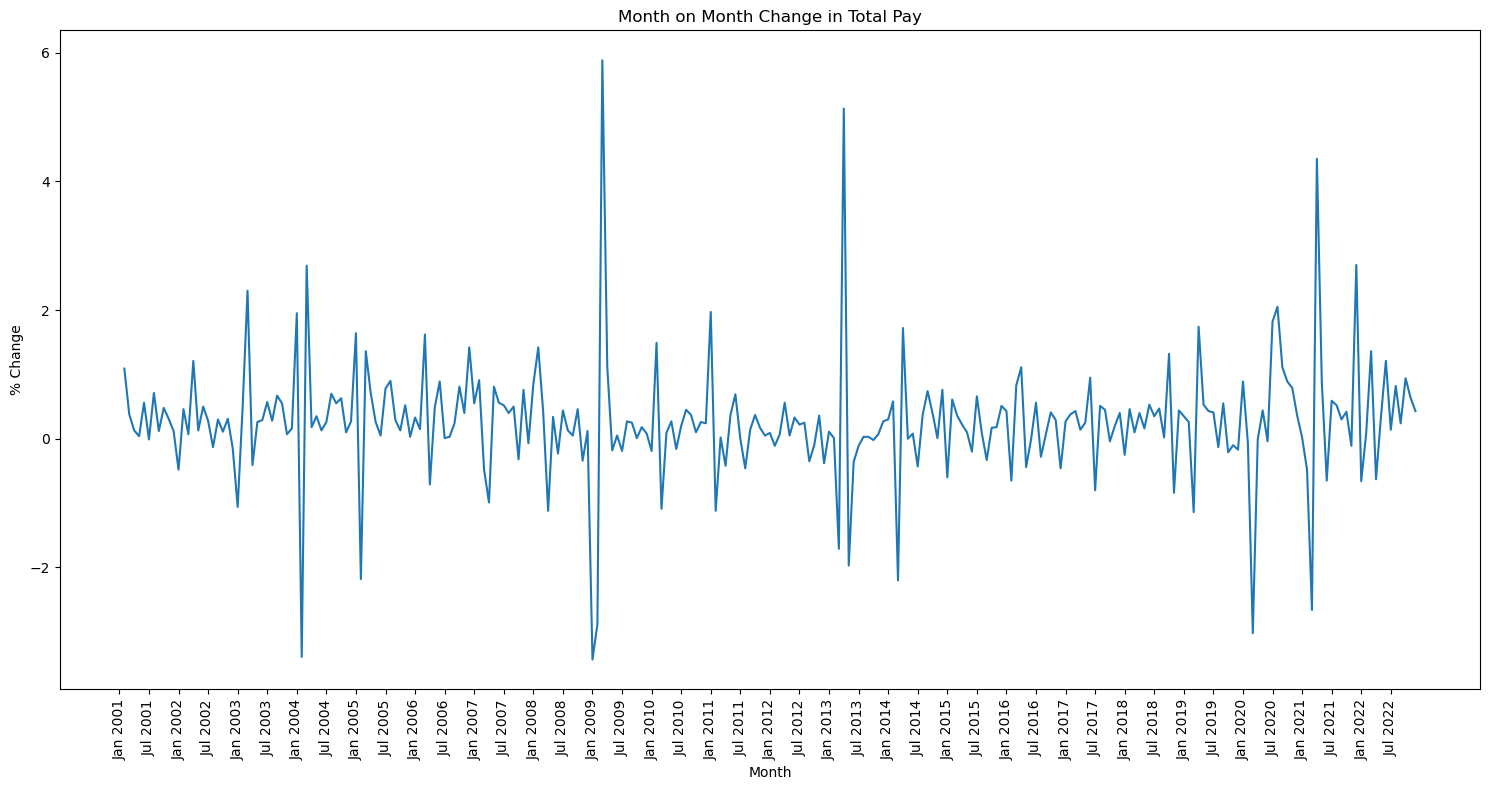

In [19]:
# Creating a line plot for % change in Weekly Total Pay (month on month)

plt.figure(figsize=(15,8))
plt.plot(wgr_filtered['Month'], wgr_filtered['% change in Weekly Total Pay (Month on Month)'])
plt.title('Month on Month Change in Total Pay')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.xticks(wgr_filtered['Month'][::6], rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

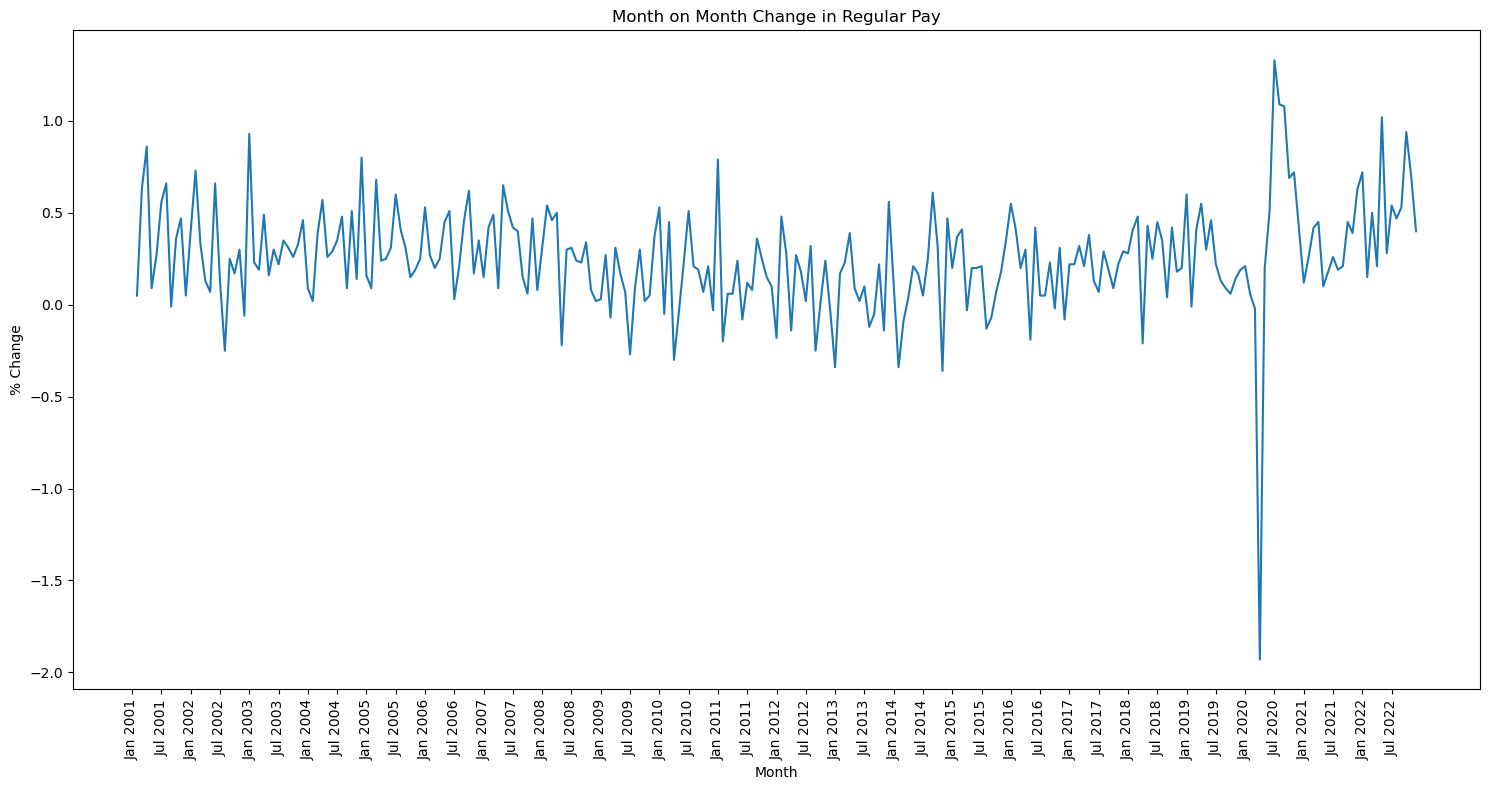

In [20]:
# Creating a line plot for % change in Weekly Regular Pay (month on month)

plt.figure(figsize=(15,8))
plt.plot(wgr_filtered['Month'], wgr_filtered['% change in Weekly Regular Pay (Month on Month)'])
plt.title('Month on Month Change in Regular Pay')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.xticks(wgr_filtered['Month'][::6], rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

### Quantitative Easing (QE)

In [22]:
# Importing the QE data excel file

qedata = pd.read_excel('QE Data.xlsx') 

# Print the output.
print(qedata.info())
qedata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Title                                                                            472 non-null    object
 1   BoE: Asset Purchase Facility: Total Asset purchases: BoE code YWWB9R9: £m CPNSA  471 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB
None


,Title,BoE: Asset Purchase Facility: Total Asset purchases: BoE code YWWB9R9: £m CPNSA
0,CDID,FZIQ
1,Source dataset ID,PUSF
2,PreUnit,£
3,Unit,m
4,Release date,20-09-2024


In [23]:
#Cleaning and formating the data
# Renaming the columns
# Create a list of new column names
new_column_names = ['Year / Quarter', 'Total Asset Purchases (GBP million)']

# Rename the columns
qedata.columns = new_column_names

# Display the updated dataframe with new column names
qedata.head()

,Year / Quarter,Total Asset Purchases (GBP million)
0,CDID,FZIQ
1,Source dataset ID,PUSF
2,PreUnit,£
3,Unit,m
4,Release date,20-09-2024


In [24]:
# Filtering the dataset to create a dataframe with quarterly figures from 1998 Q3 to 2022 Q4
qedata_filtered = qedata[qedata['Year / Quarter'].str.contains(r'((1998 Q[3-4])|(199[9]|20[0-1][0-9]|202[0-2]) Q[1-4])')]

# Reset the index of the filtered dataframe and drop the old index
qedata_filtered.reset_index(drop=True, inplace=True)

qedata_filtered.head()

,Year / Quarter,Total Asset Purchases (GBP million)
0,1998 Q3,0
1,1998 Q4,0
2,1999 Q1,0
3,1999 Q2,0
4,1999 Q3,0


In [25]:
qedata_filtered.tail()

,Year / Quarter,Total Asset Purchases (GBP million)
93,2021 Q4,894653
94,2022 Q1,866848
95,2022 Q2,866520
96,2022 Q3,860438
97,2022 Q4,845898


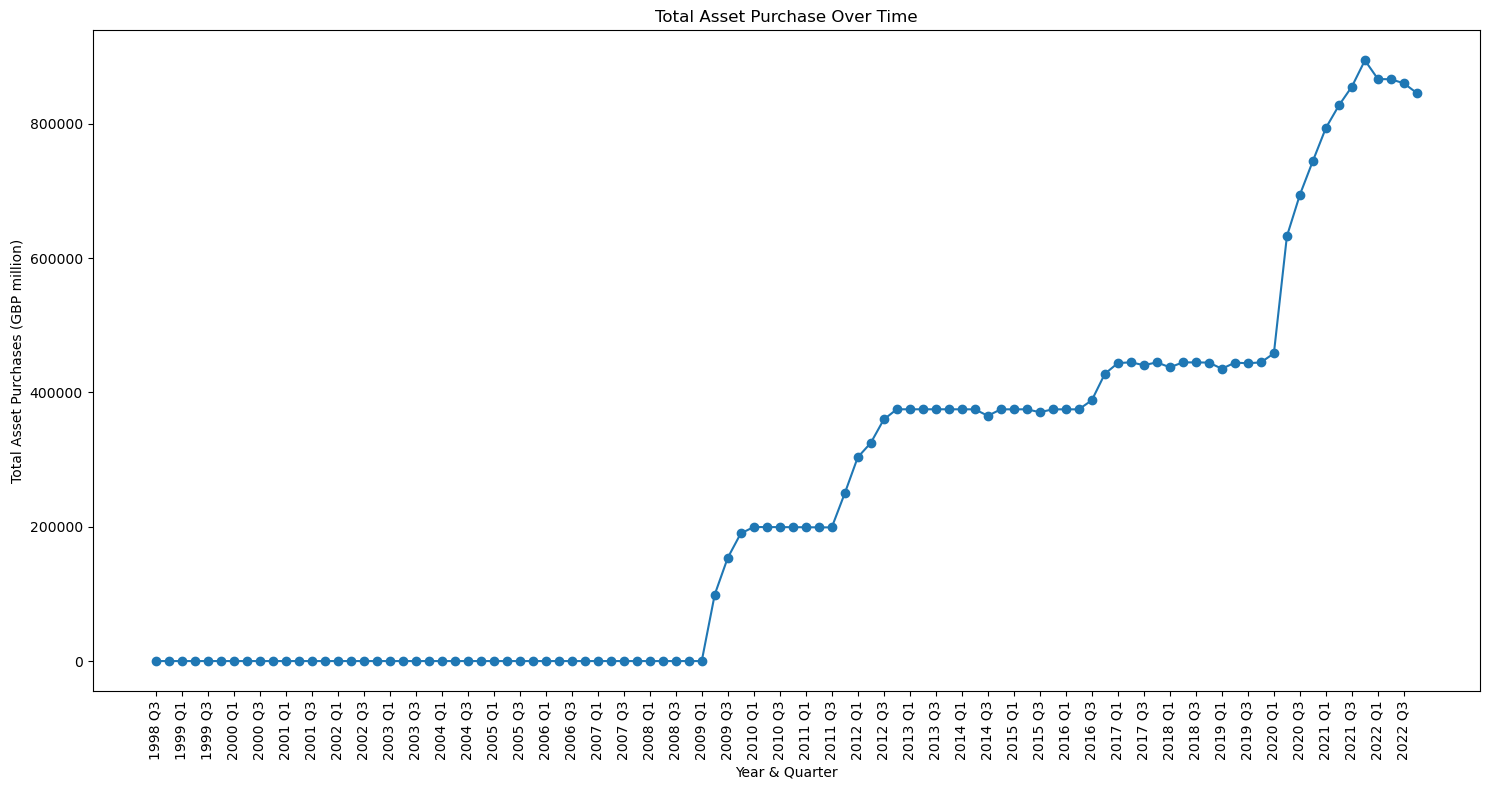

In [26]:
# Create a line plot
plt.figure(figsize=(15,8))
plt.plot(qedata_filtered['Year / Quarter'], qedata_filtered['Total Asset Purchases (GBP million)'], marker='o')
plt.title('Total Asset Purchase Over Time')
plt.xlabel('Year & Quarter')
plt.ylabel('Total Asset Purchases (GBP million)')
plt.xticks(qedata_filtered['Year / Quarter'][::2], rotation=90) 
plt.grid(False)
plt.tight_layout()
plt.show()

- QE was first launched in the UK in 2009 in response to the impact of the Global Financial Crisis (GFC) on the UK economy.
- QE1 program was initiated in March 2009, with an initial GBP75 billion worth of government bond purchases. Subsequent increases in QE2 and QE3 brought total purchases to £375 billion by 2012.
- QE4 which began in 2016 was in response to Brexit which caused financial instability and uncertainty about the future economic outlook. In this phase the BoE purchased GBP60bn of government bonds and GBP10bn of corporate bonds.
- QE5 launched in March 2020 was in response to COVID. By the end of this phase in Nov 2020 a total of GBP450 billion worth of assets were purchased.
- By the end of 2021 and 2022, inflation began to rise rapidly due to supply chain disruptions, rising energy prices, and other global factors. There were growing concerns that prolonged QE could contribute to higher inflation hence the process of gradually unwiding QE began.

### Mortgages in arrears including defaults

In [29]:
# Importing the arrear and default data excel file

addata = pd.read_excel('Arrears and Defaults.xlsx') 

# Print the output.
print(addata.info())
addata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     70 non-null     int64  
 1   Quarter                  70 non-null     object 
 2   1.5 < 2.5 % in arrears   70 non-null     float64
 3   2.5 < 5.0 % in arrears   70 non-null     float64
 4   5.0 < 7.5 % in arrears   70 non-null     float64
 5   7.5 < 10 % in arrears    70 non-null     float64
 6   10 % or more in arrears  70 non-null     float64
 7   In possession (%)        70 non-null     float64
 8   TOTAL (%)                70 non-null     float64
 9   New Possessions (Units)  70 non-null     int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ KB
None


,Year,Quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units)
0,2007,Q1,0.763,0.730,0.232,0.089,0.104,0.141,2.059,6472
1,2007,Q2,0.762,0.744,0.239,0.090,0.103,0.142,2.079,6464
2,2007,Q3,0.765,0.751,0.263,0.094,0.111,0.148,2.132,6838
3,2007,Q4,0.811,0.790,0.269,0.103,0.119,0.170,2.262,8135
4,2008,Q1,0.837,0.846,0.290,0.108,0.130,0.203,2.415,9174


In [30]:
# Merge 'Year' and 'Quarter' into a new column 'Year / Quarter' with format "Year Quarter"

addata['Year / Quarter'] = addata['Year'].astype(str) + ' ' + addata['Quarter']
addata.head()

,Year,Quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Year / Quarter
0,2007,Q1,0.763,0.730,0.232,0.089,0.104,0.141,2.059,6472,2007 Q1
1,2007,Q2,0.762,0.744,0.239,0.090,0.103,0.142,2.079,6464,2007 Q2
2,2007,Q3,0.765,0.751,0.263,0.094,0.111,0.148,2.132,6838,2007 Q3
3,2007,Q4,0.811,0.790,0.269,0.103,0.119,0.170,2.262,8135,2007 Q4
4,2008,Q1,0.837,0.846,0.290,0.108,0.130,0.203,2.415,9174,2008 Q1


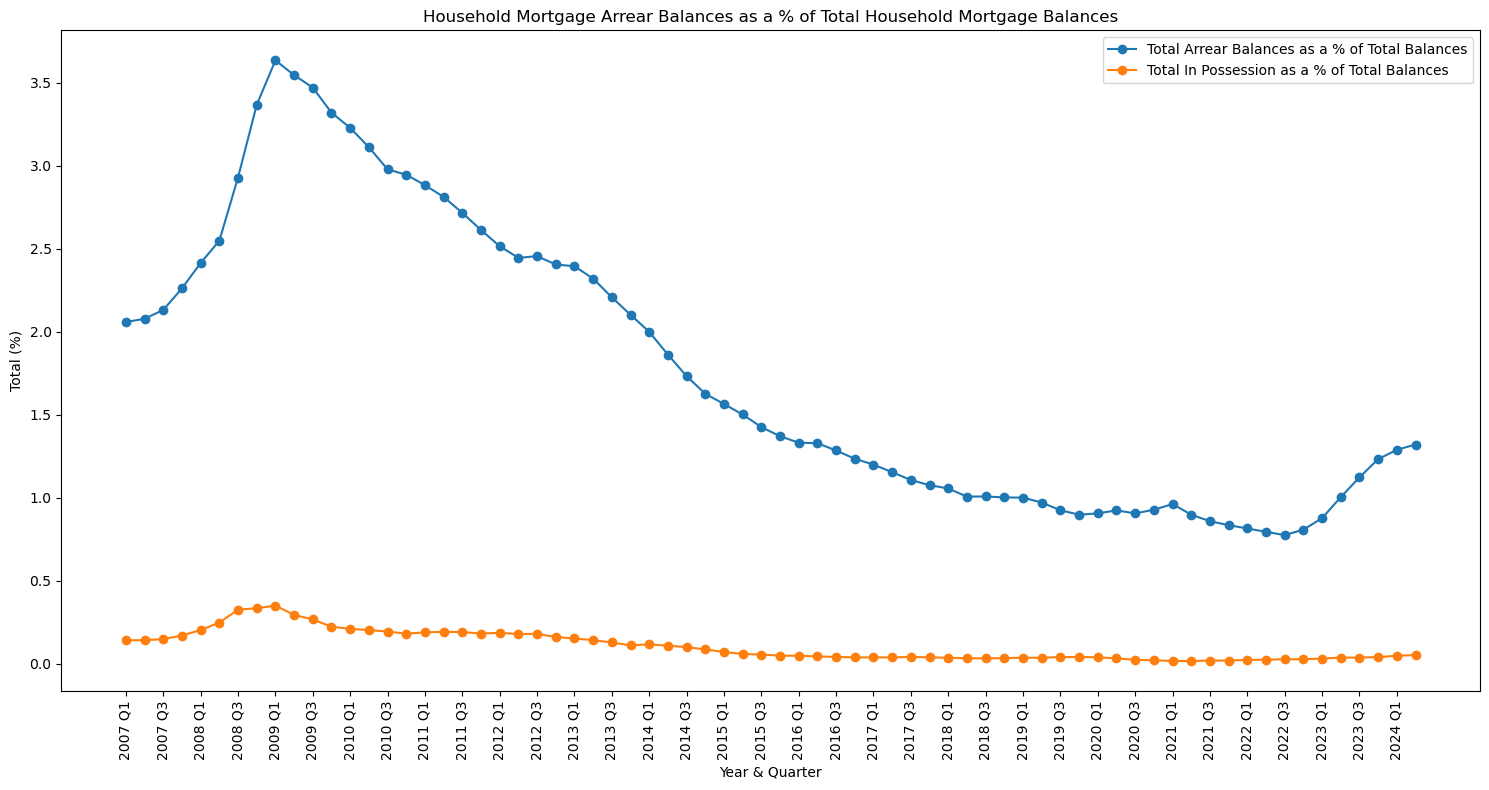

In [31]:
# Create a line plot
plt.figure(figsize=(15,8))
plt.plot(addata['Year / Quarter'], addata['TOTAL (%)'], marker='o')
plt.plot(addata['Year / Quarter'], addata['In possession (%)'], marker='o')
plt.title('Household Mortgage Arrear Balances as a % of Total Household Mortgage Balances')
plt.xlabel('Year & Quarter')
plt.ylabel('Total (%)')
plt.xticks(addata['Year / Quarter'][::2], rotation=90)
plt.legend(['Total Arrear Balances as a % of Total Balances', 'Total In Possession as a % of Total Balances'], loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()

1. During the 2008 financial crisis, mortgage arrears spiked as many households struggled with job losses and high debt levels, reaching 3.64% by 2009. In the years following, arrears steadily declined as the economy recovered and interest rates remained low.
2. Mortgage arrears have increased again recently, reaching a seven-year high at the end of 2023, with 1.23% of mortgage balances in arrears. This trend has been driven by a combination of higher living costs and successive interest rate hikes by the Bank of England to combat inflation

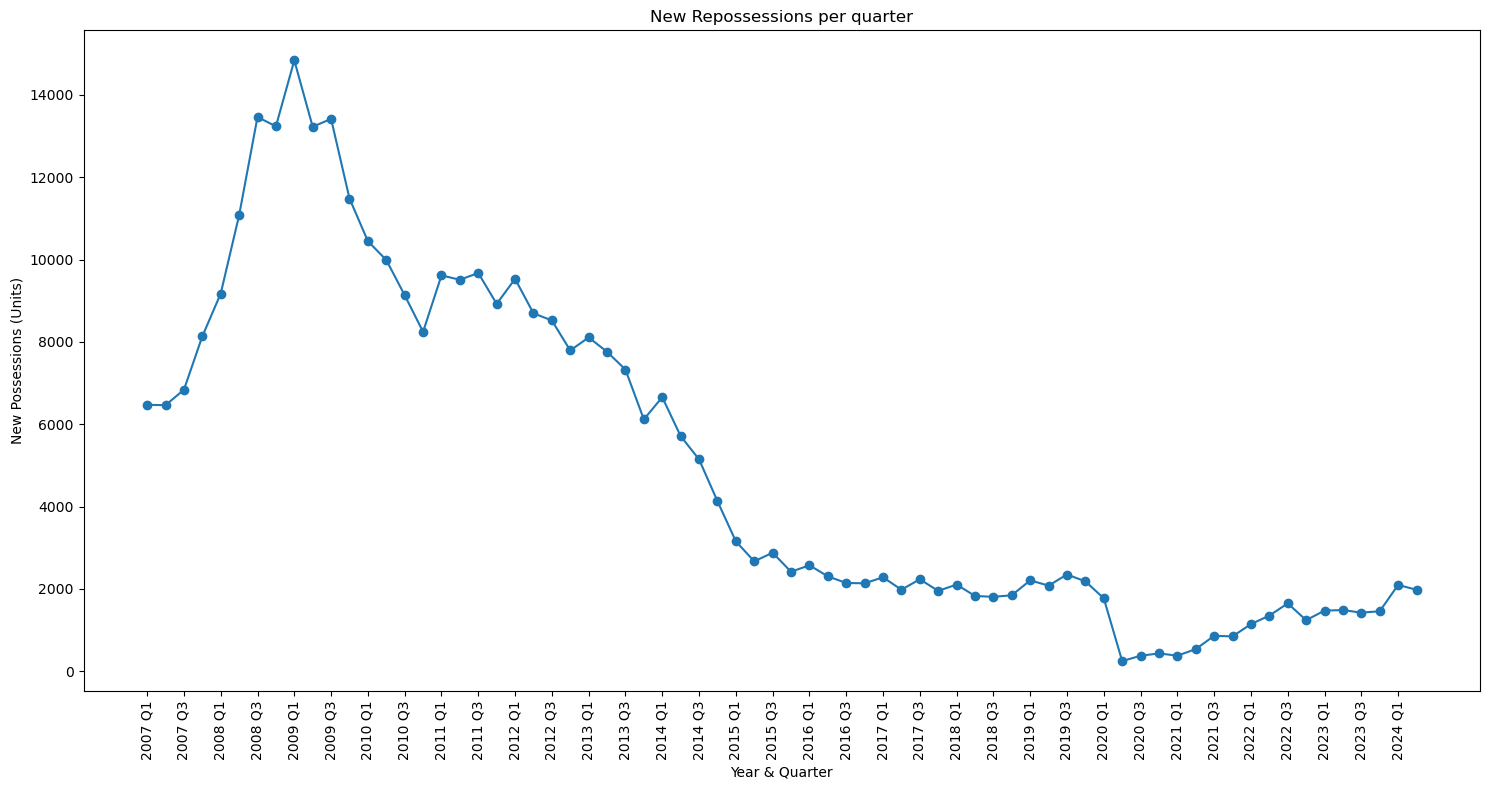

In [33]:
# Create a line plot for number of new possessions per quarter
plt.figure(figsize=(15,8))
plt.plot(addata['Year / Quarter'], addata['New Possessions (Units)'], marker='o')
plt.title('New Repossessions per quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('New Possessions (Units)')
plt.xticks(addata['Year / Quarter'][::2], rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

1. In 2008-2009, repossessions spiked as the housing market downturn and economic conditions led to higher mortgage defaults. During this period, possession rates reached new heights, with approximately 100,000 properties repossessed.
2. Following the peak, repossessions began to decline steadily, reaching much lower levels through the 2010s due to improved economic conditions, lower interest rates, and measures to support struggling homeowners.
3. By 2020, repossessions had fallen considerably, further influenced by a moratorium on repossessions introduced by the FCA during the COVID-19 pandemic. Most recently, rising interest rates and inflation have caused a modest uptick in repossessions but nowhere near what was experienced during the GFC.

## **Economic Indicators and sentiment scores**

### FinBert Model

In [37]:
# Load the bert sentiment csv dataset
bert = pd.read_csv('bert_sentiment_uk.csv')

bert.info()
bert.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reference          1209 non-null   object 
 1   country            1209 non-null   object 
 2   date               1209 non-null   object 
 3   quarter            1209 non-null   object 
 4   year_month         1209 non-null   object 
 5   weekday            1209 non-null   object 
 6   year               1209 non-null   int64  
 7   title              1209 non-null   object 
 8   author             1209 non-null   object 
 9   is_gov             1209 non-null   int64  
 10  len                1209 non-null   int64  
 11  text               1209 non-null   object 
 12  speech_tokens      1209 non-null   object 
 13  filtered_tokens    1209 non-null   object 
 14  finbert_pos        1209 non-null   float64
 15  finbert_neg        1209 non-null   float64
 16  finbert_neu        1209 

,reference,country,date,quarter,year_month,weekday,year,title,author,is_gov,len,text,speech_tokens,filtered_tokens,finbert_pos,finbert_neg,finbert_neu,finbert_sentiment,finbert_score,team_sentiment
0,r980915a_BOE,united kingdom,1998-09-15,1998Q3,1998-09-01,Tuesday,1998,Speech,george,0,13731,thank you chairman im actually very pleased to...,"['thank', 'you', 'chairman', 'im', 'actually',...","['thank', 'chairman', 'im', 'actually', 'pleas...",0.087535,0.325207,0.587258,neutral,-0.237672,neutral-negative
1,r981021b_BOE,united kingdom,1998-10-21,1998Q4,1998-10-01,Wednesday,1998,Britain in Europe,george,0,24263,its a great pleasure to be here in the beautif...,"['its', 'a', 'great', 'pleasure', 'to', 'be', ...","['great', 'pleasure', 'beautiful', 'city', 'br...",0.212209,0.017505,0.770286,neutral,0.194704,neutral-positive
2,r981021a_BOE,united kingdom,1998-10-21,1998Q4,1998-10-01,Wednesday,1998,Impact of the recent turbulence in internation...,king,1,13678,few industries have suffered more from volatil...,"['few', 'industries', 'have', 'suffered', 'mor...","['industries', 'suffered', 'volatility', 'brit...",0.047679,0.476351,0.475970,negative,-0.428672,negative
3,r981101a_BOE,united kingdom,1998-11-01,1998Q4,1998-11-01,Sunday,1998,"Economic policy, with and without forecasts",budd,0,27679,my topic this evening is the use of forecasts ...,"['my', 'topic', 'this', 'evening', 'is', 'the'...","['topic', 'evening', 'use', 'forecasts', 'econ...",0.046829,0.049165,0.904007,neutral,-0.002336,neutral
4,r981101b_BOE,united kingdom,1998-11-01,1998Q4,1998-11-01,Sunday,1998,Inflation targeting in practice: the UK experi...,vickers,0,27693,six years ago this week sterling left the exch...,"['six', 'years', 'ago', 'this', 'week', 'sterl...","['six', 'years', 'ago', 'week', 'sterling', 'l...",0.035134,0.049842,0.915023,neutral,-0.014708,neutral


### Annual Trends - Sentiment Scores and Economic Indicators

In [39]:
# Create annual average DataFrame
# Group by the 'year' column and calculate the mean of 'finbert_score'
annual_bert = bert.groupby('year')['finbert_score'].mean().reset_index()

# Rename the columns for clarity
annual_bert.columns = ['Year', 'annual_finbert_score']

annual_bert.head(10)

,Year,annual_finbert_score
0,1998,-0.131586
1,1999,0.014448
2,2000,0.051271
3,2001,-0.100805
4,2002,-0.033780
5,2003,0.043540
6,2004,-0.021748
7,2005,-0.027226
8,2006,0.004251
9,2007,0.094994


In [40]:
# Loading the annual datasets
addata_annual = pd.read_excel('Arrears and Defaults Annual.xlsx')
hsr_annual = pd.read_csv('Household Savings Ratio Annual.csv') 
qedata_annual = pd.read_excel('QE Data Annual.xlsx')

In [41]:
# First merge with Household Savings Ratio Annual data
merged_df = pd.merge(annual_bert, hsr_annual, on='Year', how='left')

# Then merge with Arrears and Default Annual data
merged_df = pd.merge(merged_df, addata_annual, on='Year', how='left')

# Finally merge with QE Data Annual
merged_df = pd.merge(merged_df, qedata_annual, on='Year', how='left')

merged_df.head()

,Year,annual_finbert_score,Households saving ratio (per cent),1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
0,1998,-0.131586,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1999,0.014448,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2000,0.051271,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2001,-0.100805,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2002,-0.033780,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [42]:
merged_df.tail()

,Year,annual_finbert_score,Households saving ratio (per cent),1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
20,2018,0.041396,5.4,0.274,0.280,0.121,0.067,0.226,0.034,1.002,7593.0,444566
21,2019,0.035535,5.5,0.243,0.246,0.104,0.058,0.206,0.040,0.898,8826.0,444810
22,2020,-0.033811,16.8,0.232,0.253,0.121,0.070,0.233,0.020,0.928,2835.0,744922
23,2021,0.014704,12.7,0.178,0.218,0.113,0.067,0.240,0.019,0.835,2630.0,894653
24,2022,0.013892,6.0,0.190,0.215,0.099,0.062,0.216,0.027,0.808,5392.0,845898


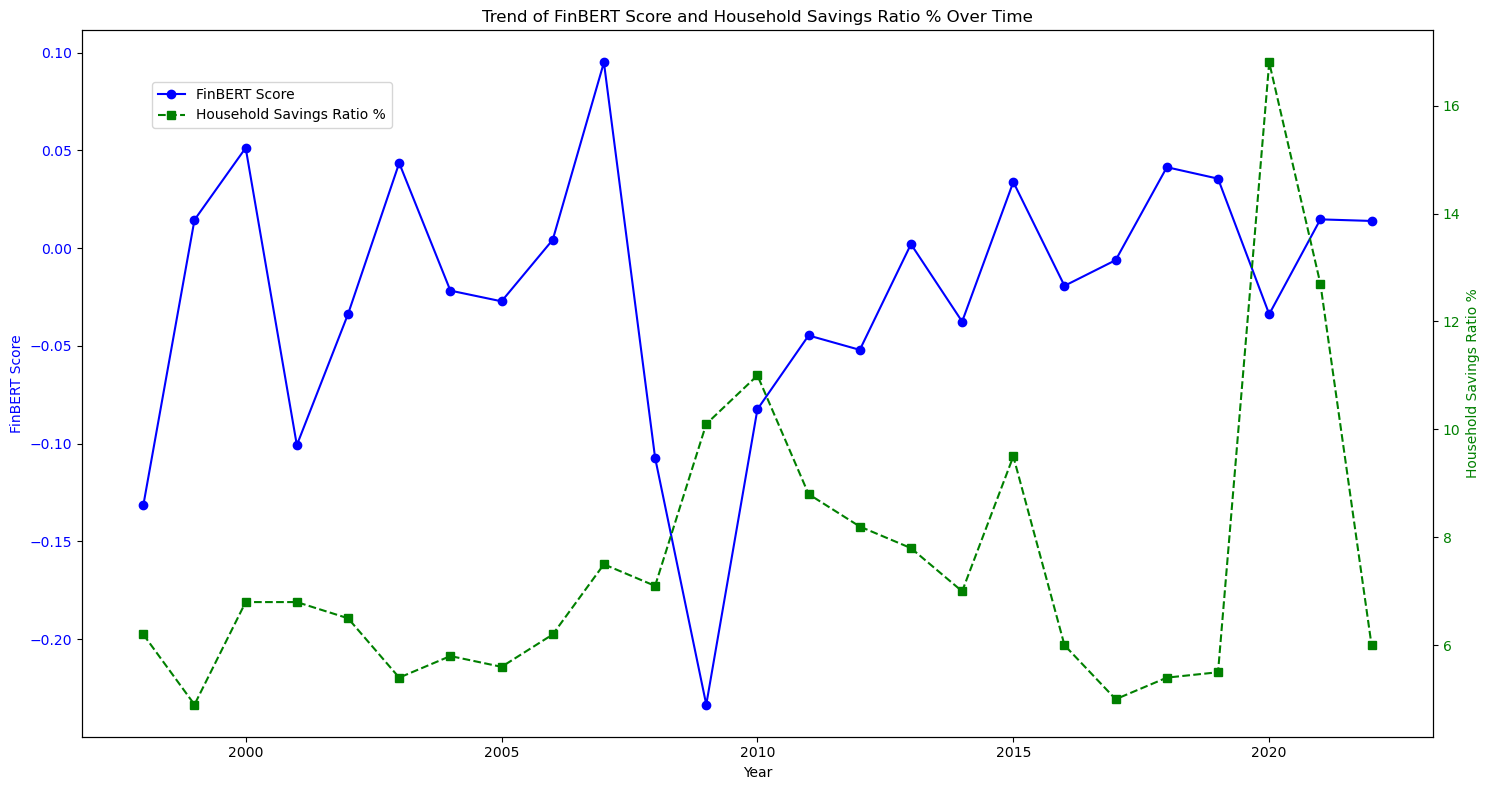

In [43]:
# Plotting Finbert Score and Household Savings Ratio over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(merged_df['Year'], merged_df['annual_finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Year')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for household savings ratio
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['Households saving ratio (per cent)'], color='g', marker='s', linestyle='--', label='Household Savings Ratio %')
ax2.set_ylabel('Household Savings Ratio %', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Trend of FinBERT Score and Household Savings Ratio % Over Time')
fig.tight_layout()  # For better spacing
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

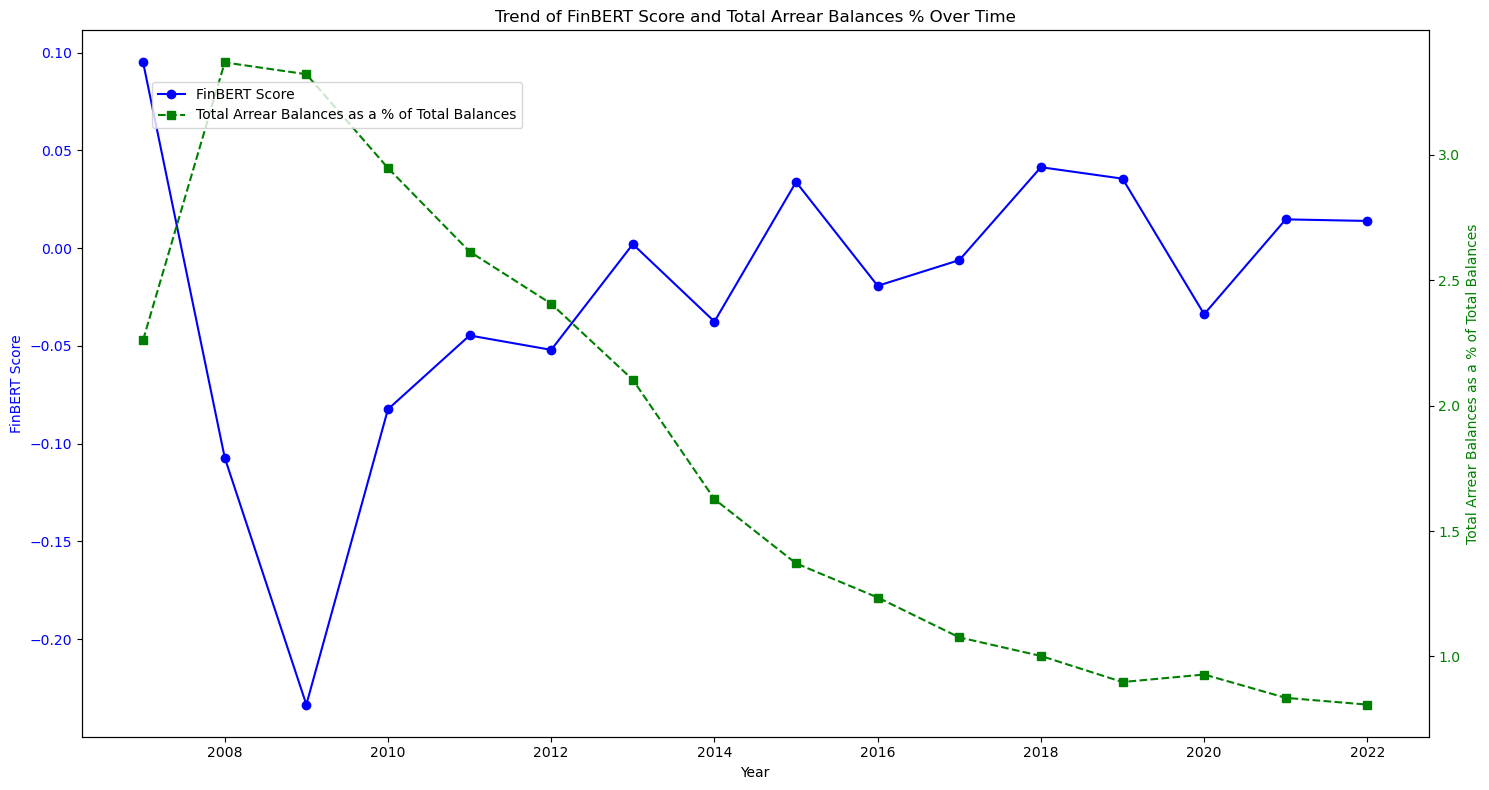

In [44]:
# Plotting Finbert Score and Arrears over time
# Filter dataframe for years 2007 and after as data for Arrears is avaialble for that time frame
merged_filtered = merged_df[(merged_df['Year'] >= 2007)]

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(merged_filtered['Year'], merged_filtered['annual_finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Year')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Arrear Balances as a percentage of Total Balances
ax2 = ax1.twinx()
ax2.plot(merged_filtered['Year'], merged_filtered['TOTAL (%)'], color='g', marker='s', linestyle='--', label='Total Arrear Balances as a % of Total Balances')
ax2.set_ylabel('Total Arrear Balances as a % of Total Balances', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Trend of FinBERT Score and Total Arrear Balances % Over Time')
fig.tight_layout()  # For better spacing
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

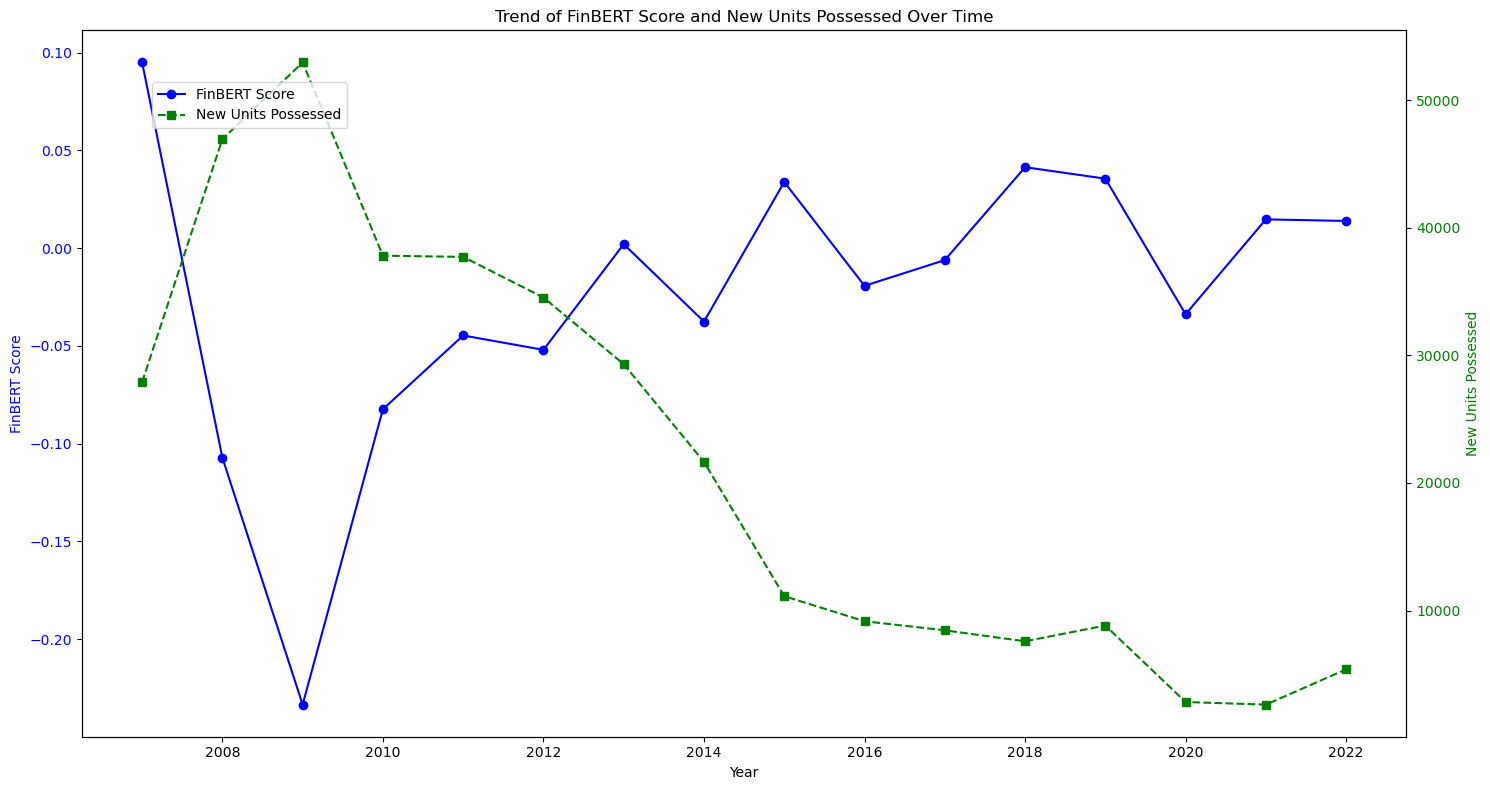

In [45]:
# Plotting Finbert Score and Possessions (Units) over time
# Using the Filter dataframe for years 2007 and after as data for Defaults is avaialble for that time frame

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(merged_filtered['Year'], merged_filtered['annual_finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Year')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Possessions (units)
ax2 = ax1.twinx()
ax2.plot(merged_filtered['Year'], merged_filtered['New Possessions (Units)'], color='g', marker='s', linestyle='--', label='New Units Possessed')
ax2.set_ylabel('New Units Possessed', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Trend of FinBERT Score and New Units Possessed Over Time')
fig.tight_layout()  # For better spacing
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

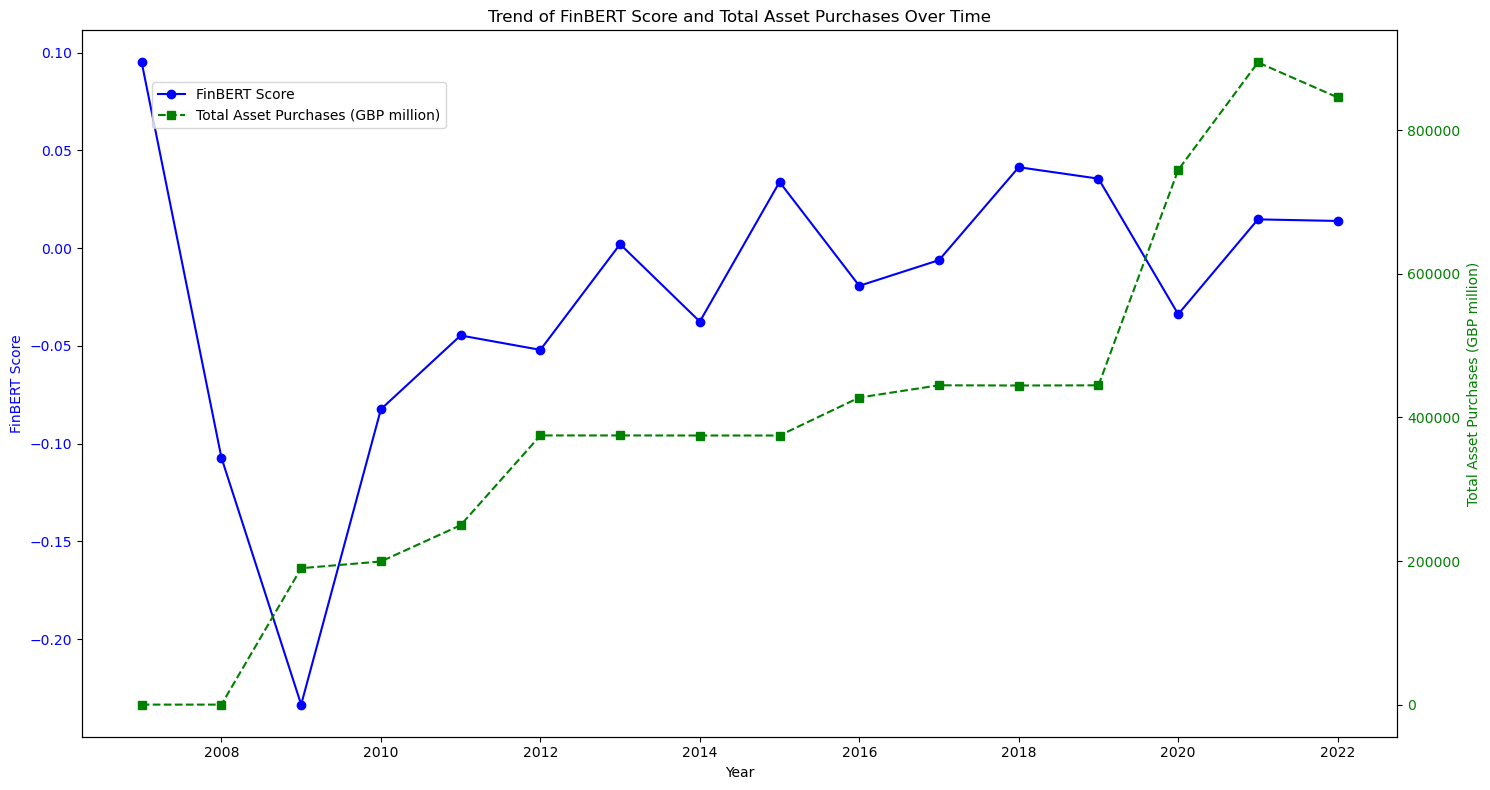

In [46]:
# Plotting Finbert Score and QE over time
# Using the Filter dataframe for years 2007 and after as QE started only in 2009

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(merged_filtered['Year'], merged_filtered['annual_finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Year')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Asset Purchases over time
ax2 = ax1.twinx()
ax2.plot(merged_filtered['Year'], merged_filtered['Total Asset Purchases (GBP million)'], color='g', marker='s', linestyle='--', label='Total Asset Purchases (GBP million)')
ax2.set_ylabel('Total Asset Purchases (GBP million)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Trend of FinBERT Score and Total Asset Purchases Over Time')
fig.tight_layout()  # For better spacing
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

### Quarterly Trends - Sentiment Scores and Economic Indicators

In [48]:
# Create a quarterly average DataFrame
# Group by the 'quarter' column and calculate the mean of 'finbert_score'
quarterly_bert = bert.groupby('quarter')['finbert_score'].mean().reset_index()

# Rename the columns for clarity
quarterly_bert.columns = ['Quarter', 'Finbert_score']

quarterly_bert.head(10)

,Quarter,Finbert_score
0,1998Q3,-0.237672
1,1998Q4,-0.116431
2,1999Q1,0.041918
3,1999Q2,0.053082
4,1999Q3,-0.007517
5,1999Q4,-0.032109
6,2000Q1,-0.078866
7,2000Q2,0.108247
8,2000Q3,0.274143
9,2000Q4,-0.052928


In [49]:
# Make a copy of the Household Savings Ratio filtered dataframe
hsr_filtered_copy = hsr_filtered.copy()

# Rename the columns
hsr_filtered_copy.rename(columns={'Year / Quarter': 'Quarter'}, inplace=True)

# Remove the space between year and quarter
hsr_filtered_copy['Quarter'] = hsr_filtered_copy['Quarter'].str.replace(" ", "")

hsr_filtered_copy.head()

,Quarter,Savings Ratio (%)
0,1998Q3,5.2
1,1998Q4,5.1
2,1999Q1,2.9
3,1999Q2,5.2
4,1999Q3,4.8


In [50]:
# Make a copy of the Quantitivate Easing filtered dataframe
qedata_filtered_copy = qedata_filtered.copy()

# Rename the columns
qedata_filtered_copy.rename(columns={'Year / Quarter': 'Quarter'}, inplace=True)

# Remove the space between year and quarter
qedata_filtered_copy['Quarter'] = qedata_filtered_copy['Quarter'].str.replace(" ", "")

qedata_filtered_copy.head()

,Quarter,Total Asset Purchases (GBP million)
0,1998Q3,0
1,1998Q4,0
2,1999Q1,0
3,1999Q2,0
4,1999Q3,0


In [51]:
addata.head()

,Year,Quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Year / Quarter
0,2007,Q1,0.763,0.730,0.232,0.089,0.104,0.141,2.059,6472,2007 Q1
1,2007,Q2,0.762,0.744,0.239,0.090,0.103,0.142,2.079,6464,2007 Q2
2,2007,Q3,0.765,0.751,0.263,0.094,0.111,0.148,2.132,6838,2007 Q3
3,2007,Q4,0.811,0.790,0.269,0.103,0.119,0.170,2.262,8135,2007 Q4
4,2008,Q1,0.837,0.846,0.290,0.108,0.130,0.203,2.415,9174,2008 Q1


In [52]:
addata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     70 non-null     int64  
 1   Quarter                  70 non-null     object 
 2   1.5 < 2.5 % in arrears   70 non-null     float64
 3   2.5 < 5.0 % in arrears   70 non-null     float64
 4   5.0 < 7.5 % in arrears   70 non-null     float64
 5   7.5 < 10 % in arrears    70 non-null     float64
 6   10 % or more in arrears  70 non-null     float64
 7   In possession (%)        70 non-null     float64
 8   TOTAL (%)                70 non-null     float64
 9   New Possessions (Units)  70 non-null     int64  
 10  Year / Quarter           70 non-null     object 
dtypes: float64(7), int64(2), object(2)
memory usage: 6.1+ KB


In [53]:
# Make a copy of the Household Savings Ratio filtered dataframe
addata_filtered_copy = addata.copy()
# Rename the columns
addata_filtered_copy.rename(columns={'Quarter': 'quarter'}, inplace=True)
addata_filtered_copy.rename(columns={'Year / Quarter': 'Quarter'}, inplace=True)

# Remove the space between year and quarter
addata_filtered_copy['Quarter'] = addata_filtered_copy['Quarter'].str.replace(" ", "")

addata_filtered_copy.head()

,Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Quarter
0,2007,Q1,0.763,0.730,0.232,0.089,0.104,0.141,2.059,6472,2007Q1
1,2007,Q2,0.762,0.744,0.239,0.090,0.103,0.142,2.079,6464,2007Q2
2,2007,Q3,0.765,0.751,0.263,0.094,0.111,0.148,2.132,6838,2007Q3
3,2007,Q4,0.811,0.790,0.269,0.103,0.119,0.170,2.262,8135,2007Q4
4,2008,Q1,0.837,0.846,0.290,0.108,0.130,0.203,2.415,9174,2008Q1


In [54]:
# First merge with Household Savings Ratio Quarterly data
quart_bert = pd.merge(quarterly_bert, hsr_filtered_copy, on='Quarter', how='left')

# Then merge with Arrears and Default Quarterly data
quart_bert = pd.merge(quart_bert, addata_filtered_copy, on='Quarter', how='left')

# Finally merge with QE Data Quarterly
quart_bert = pd.merge(quart_bert, qedata_filtered_copy, on='Quarter', how='left')

quart_bert.head()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
0,1998Q3,-0.237672,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1998Q4,-0.116431,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1999Q1,0.041918,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1999Q2,0.053082,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1999Q3,-0.007517,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


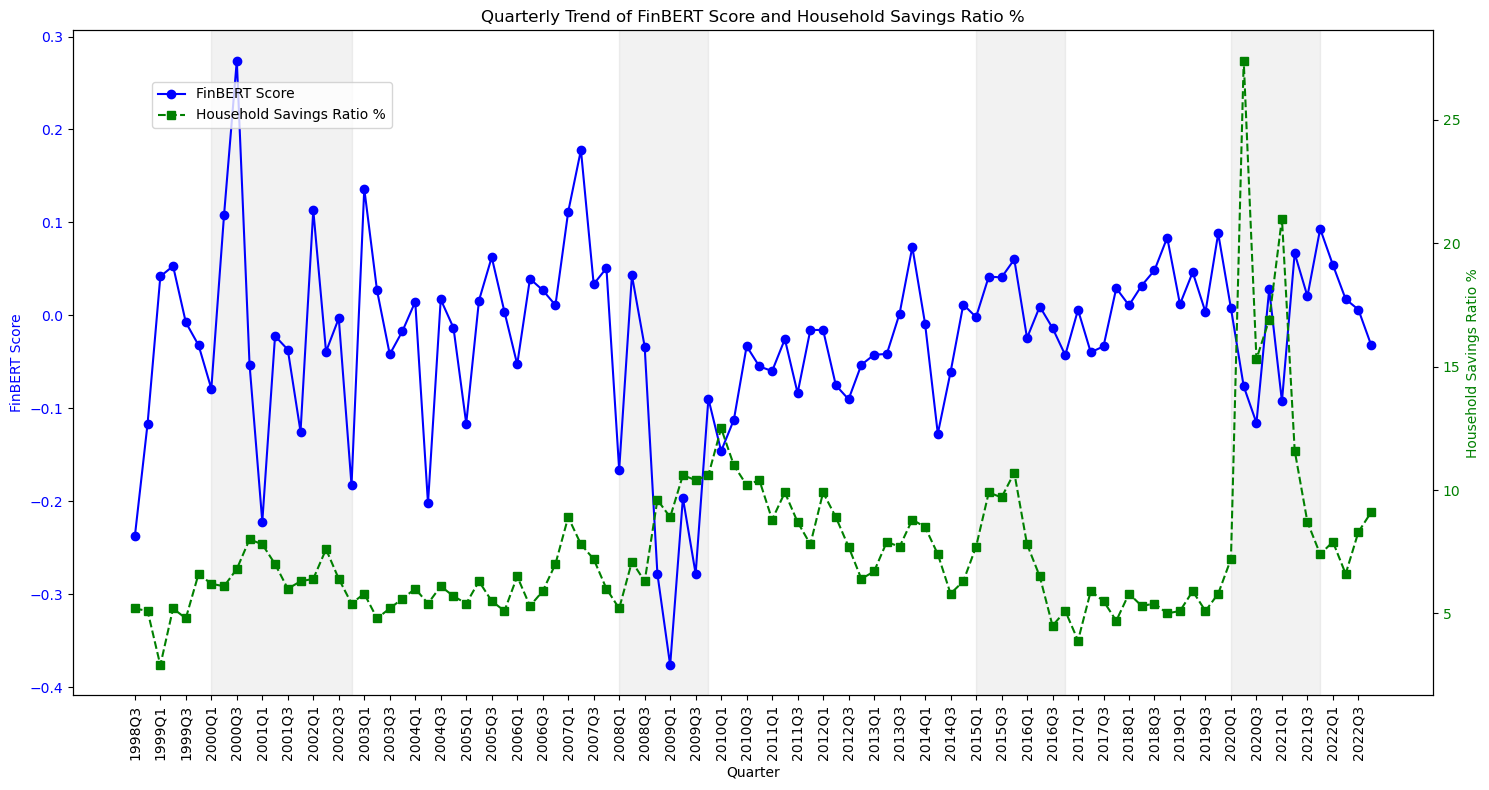

In [55]:
# Plotting Finbert Score and Household Savings Ratio over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(quart_bert['Quarter'], quart_bert['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for household savings ratio
ax2 = ax1.twinx()
ax2.plot(quart_bert['Quarter'], quart_bert['Savings Ratio (%)'], color='g', marker='s', linestyle='--', label='Household Savings Ratio %')
ax2.set_ylabel('Household Savings Ratio %', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Household Savings Ratio %')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Highlight specified ranges
highlight_ranges = [('2000Q1', '2002Q4'), ('2008Q1', '2009Q4'), ('2015Q1', '2016Q4'), ('2020Q1', '2021Q4')]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='gray', alpha=0.1)

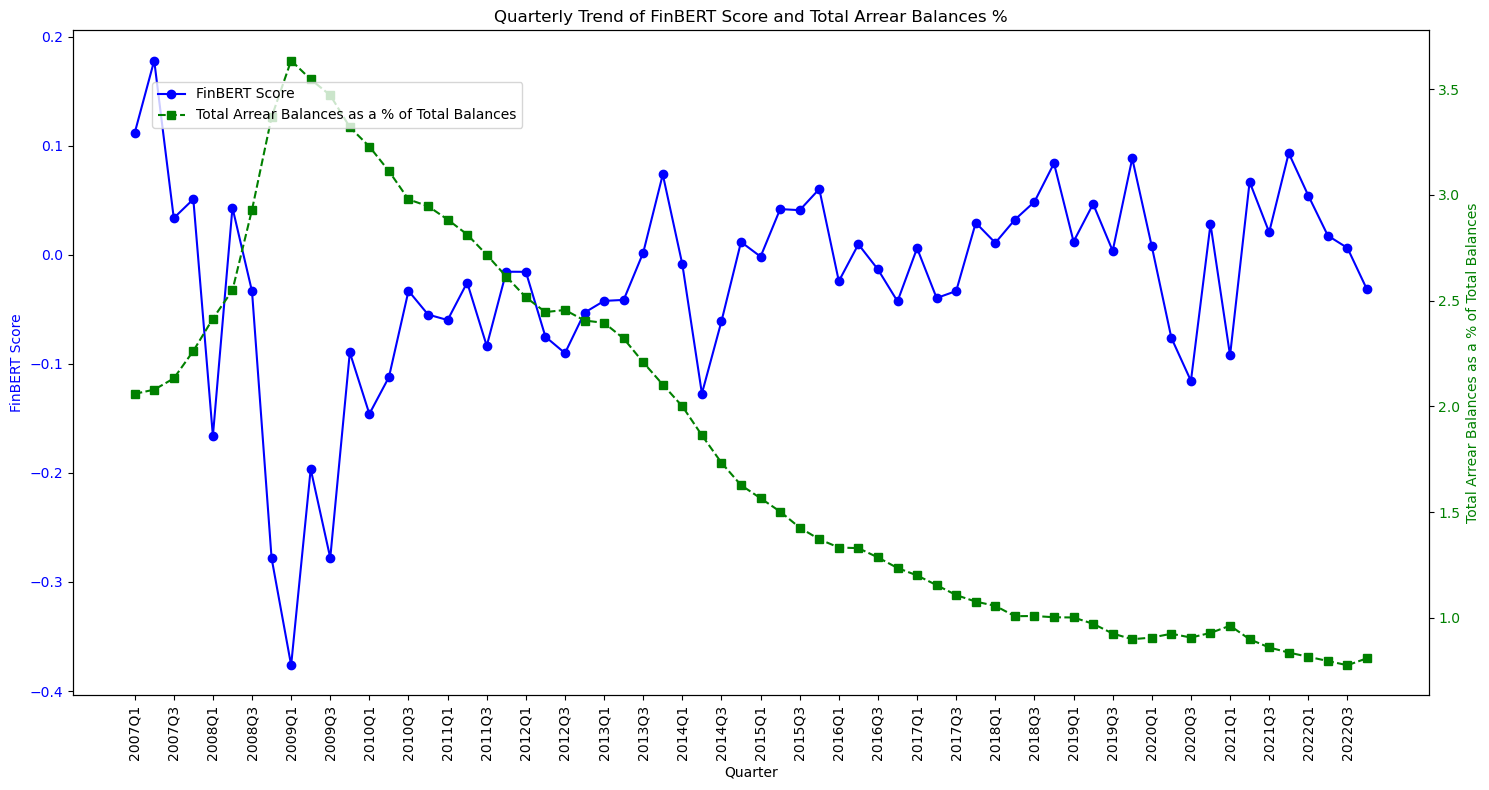

In [56]:
# Filter the DataFrame for the desired date range
quartbert_filtered = quart_bert[(quart_bert['Quarter'] >= '2007Q1') & (quart_bert['Quarter'] <= '2022Q4')]

# Plotting Finbert Score and Arrears over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(quartbert_filtered['Quarter'], quartbert_filtered['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Arrear Balances as a percentage of Total Balances
ax2 = ax1.twinx()
ax2.plot(quartbert_filtered['Quarter'], quartbert_filtered['TOTAL (%)'], color='g', marker='s', linestyle='--', label='Total Arrear Balances as a % of Total Balances')
ax2.set_ylabel('Total Arrear Balances as a % of Total Balances', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Total Arrear Balances %')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))


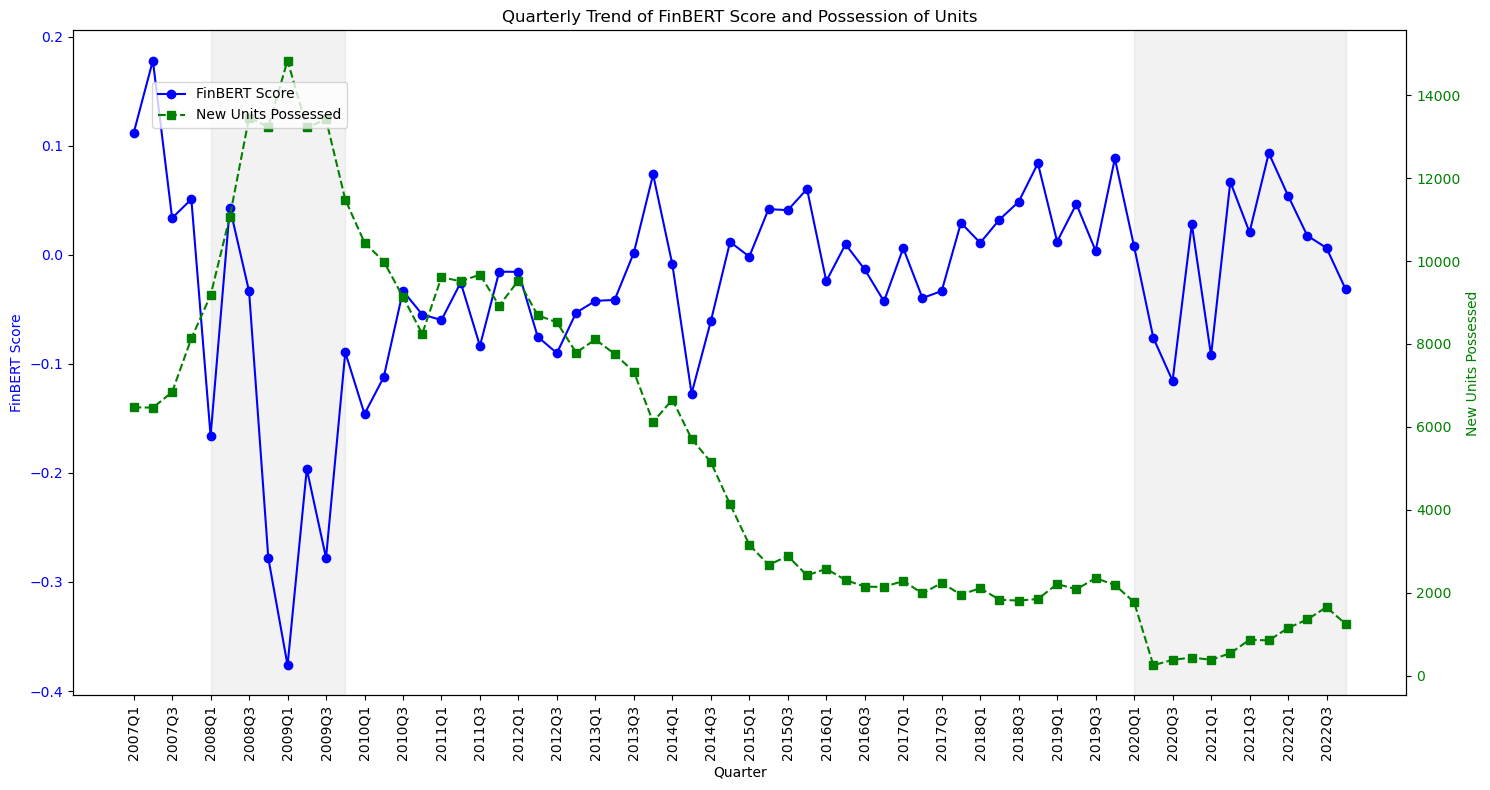

In [57]:
# Plotting Finbert Score and Possession of units over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(quartbert_filtered['Quarter'], quartbert_filtered['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Arrear Balances as a percentage of Total Balances
ax2 = ax1.twinx()
ax2.plot(quartbert_filtered['Quarter'], quartbert_filtered['New Possessions (Units)'], color='g', marker='s', linestyle='--', label='New Units Possessed')
ax2.set_ylabel('New Units Possessed', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Possession of Units')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Highlight specified ranges
highlight_ranges = [('2008Q1', '2009Q4'), ('2020Q1', '2022Q4')]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='gray', alpha=0.1)


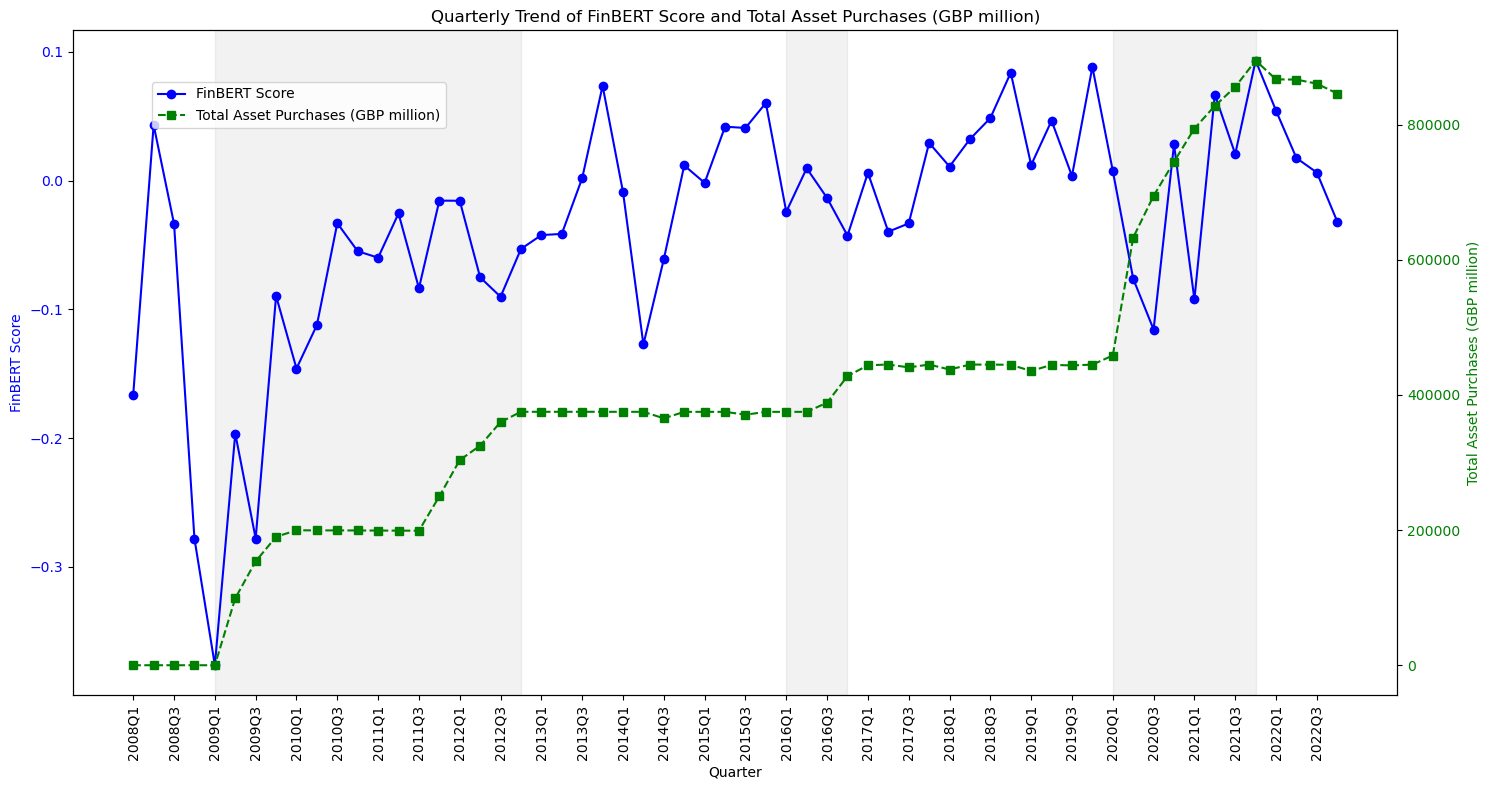

In [58]:
# Filter the DataFrame for the desired date range
# Using the Filter dataframe for years 2008 and after as QE started only in 2009
quartbert_qe = quart_bert[(quart_bert['Quarter'] >= '2008Q1') & (quart_bert['Quarter'] <= '2022Q4')]

# Plotting Finbert Score and Asset Purchases over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(quartbert_qe['Quarter'], quartbert_qe['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Asset Purchased over time
ax2 = ax1.twinx()
ax2.plot(quartbert_qe['Quarter'], quartbert_qe['Total Asset Purchases (GBP million)'], color='g', marker='s', linestyle='--', label='Total Asset Purchases (GBP million)')
ax2.set_ylabel('Total Asset Purchases (GBP million)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Total Asset Purchases (GBP million)')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Highlight specified ranges
highlight_ranges = [('2009Q1', '2012Q4'), ('2016Q1', '2016Q4'), ('2020Q1', '2021Q4')]
for start, end in highlight_ranges:
    ax1.axvspan(start, end, color='gray', alpha=0.1)

### Last Five Years (2018 - 2022) - Sentiment Scores and Economic Indicators

In [60]:
# Filter the DataFrame for the desired date range
bert_five = quart_bert[(quart_bert['Quarter'] >= '2018Q1') & (quart_bert['Quarter'] <= '2022Q4')].reset_index(drop=True)
bert_five.head()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
0,2018Q1,0.010852,5.8,2018.0,Q1,0.289,0.307,0.130,0.073,0.221,0.036,1.056,2107.0,437541
1,2018Q2,0.032147,5.3,2018.0,Q2,0.270,0.288,0.124,0.069,0.223,0.033,1.007,1830.0,444842
2,2018Q3,0.048493,5.4,2018.0,Q3,0.274,0.286,0.123,0.068,0.225,0.032,1.008,1809.0,444812
3,2018Q4,0.083752,5,2018.0,Q4,0.274,0.280,0.121,0.067,0.226,0.034,1.002,1847.0,444566
4,2019Q1,0.012018,5.1,2019.0,Q1,0.271,0.277,0.116,0.066,0.234,0.036,1.001,2209.0,435351


In [61]:
bert_five.tail()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
15,2021Q4,0.093146,7.4,2021.0,Q4,0.178,0.218,0.113,0.067,0.240,0.019,0.835,848.0,894653
16,2022Q1,0.054198,7.9,2022.0,Q1,0.167,0.210,0.109,0.064,0.242,0.023,0.815,1147.0,866848
17,2022Q2,0.017444,6.6,2022.0,Q2,0.168,0.202,0.104,0.063,0.235,0.024,0.795,1353.0,866520
18,2022Q3,0.006201,8.3,2022.0,Q3,0.172,0.197,0.099,0.060,0.220,0.027,0.775,1650.0,860438
19,2022Q4,-0.031868,9.1,2022.0,Q4,0.190,0.215,0.099,0.062,0.216,0.027,0.808,1242.0,845898


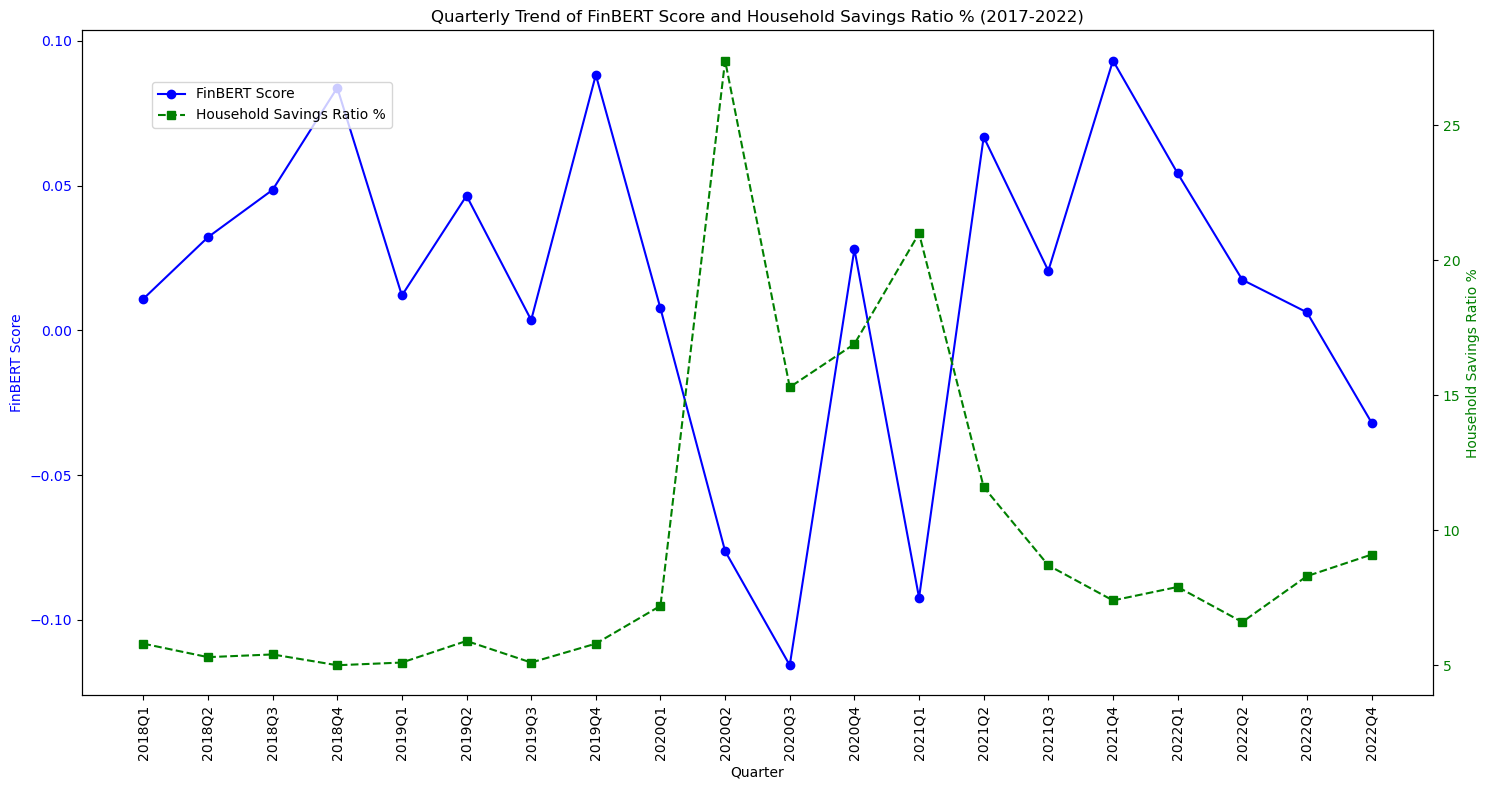

In [62]:
# Plotting Finbert Score and Household Savings Ratio for the last 5 years
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(bert_five['Quarter'], bert_five['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for household savings ratio
ax2 = ax1.twinx()
ax2.plot(bert_five['Quarter'], bert_five['Savings Ratio (%)'], color='g', marker='s', linestyle='--', label='Household Savings Ratio %')
ax2.set_ylabel('Household Savings Ratio %', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
# ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Household Savings Ratio % (2017-2022)')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

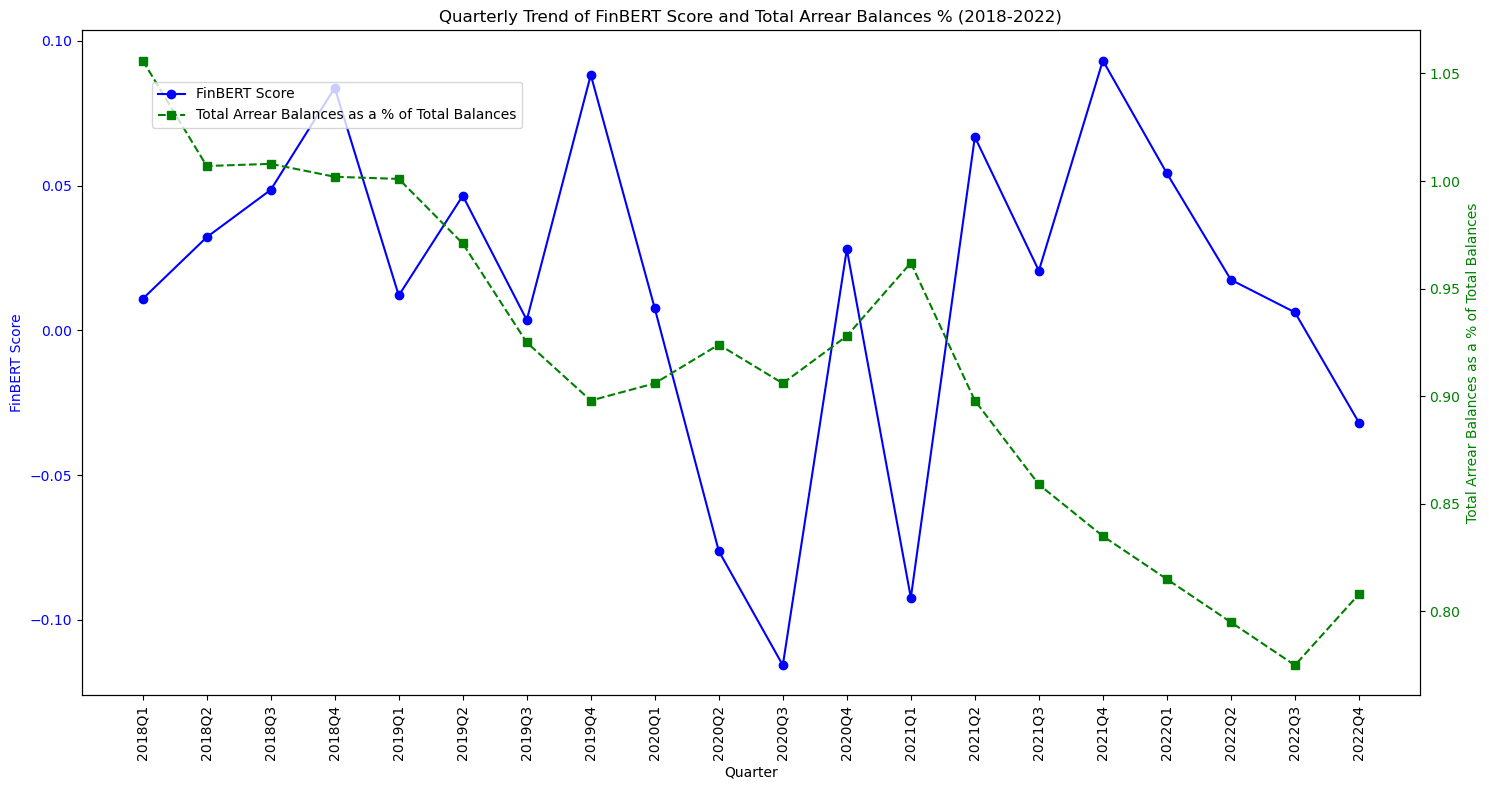

In [63]:
# Plotting Finbert Score and Arrears over the last five years
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(bert_five['Quarter'], bert_five['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Arrear Balances as a percentage of Total Balances
ax2 = ax1.twinx()
ax2.plot(bert_five['Quarter'], bert_five['TOTAL (%)'], color='g', marker='s', linestyle='--', label='Total Arrear Balances as a % of Total Balances')
ax2.set_ylabel('Total Arrear Balances as a % of Total Balances', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
#ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Total Arrear Balances % (2018-2022)')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

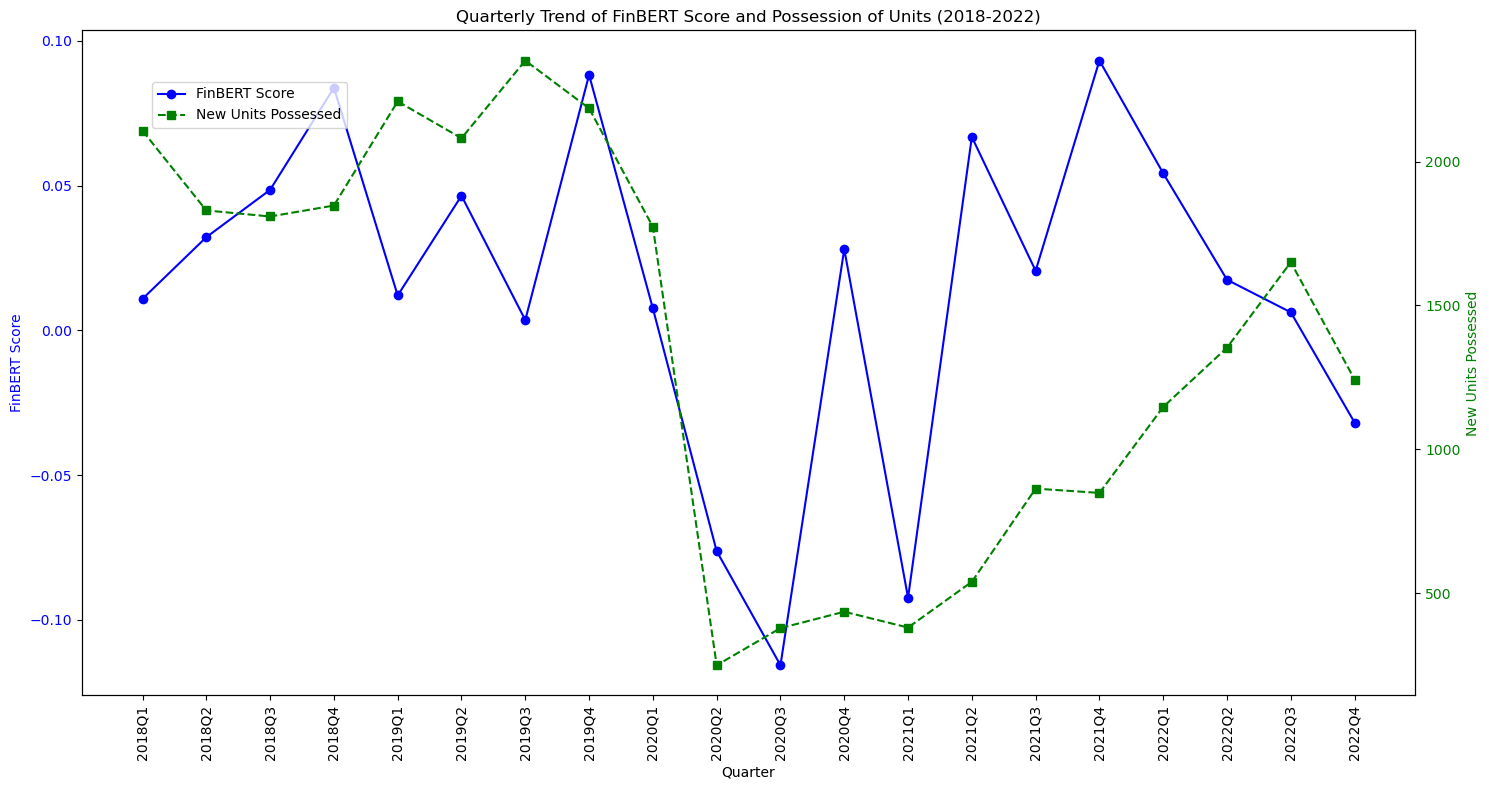

In [64]:
# Plotting Finbert Score and Possession of units over the last five years
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(bert_five['Quarter'], bert_five['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Arrear Balances as a percentage of Total Balances
ax2 = ax1.twinx()
ax2.plot(bert_five['Quarter'], bert_five['New Possessions (Units)'], color='g', marker='s', linestyle='--', label='New Units Possessed')
ax2.set_ylabel('New Units Possessed', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
#ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Possession of Units (2018-2022)')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

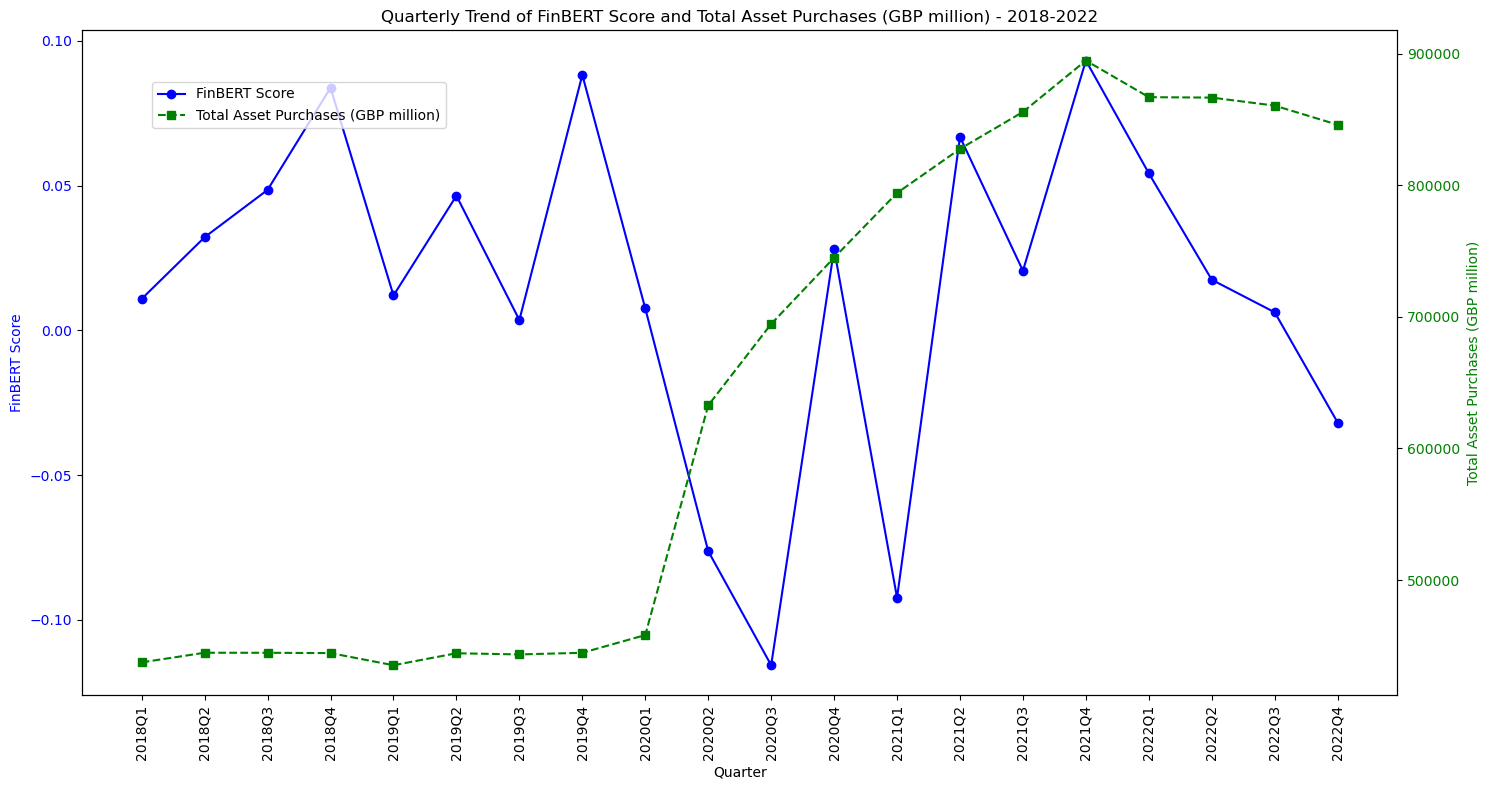

In [65]:
# Plotting Finbert Score and Asset Purchases over the last 5 years
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot finbert_score on the left y-axis
ax1.plot(bert_five['Quarter'], bert_five['Finbert_score'], color='b', marker='o', label='FinBERT Score')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('FinBERT Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Asset Purchased over time
ax2 = ax1.twinx()
ax2.plot(bert_five['Quarter'], bert_five['Total Asset Purchases (GBP million)'], color='g', marker='s', linestyle='--', label='Total Asset Purchases (GBP million)')
ax2.set_ylabel('Total Asset Purchases (GBP million)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Rotate x-axis ticks by 90 degrees
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Show every alternate tick
# Get current ticks and set every alternate tick
ticks = ax1.get_xticks()  
# ax1.set_xticks(ticks[::2])

# Title and legend
plt.title('Quarterly Trend of FinBERT Score and Total Asset Purchases (GBP million) - 2018-2022')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

## **Correlation & Linear Regression Model**

### Finbert Score and Household Savings Ratio

In [68]:
quart_bert.head()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
0,1998Q3,-0.237672,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1998Q4,-0.116431,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1999Q1,0.041918,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1999Q2,0.053082,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1999Q3,-0.007517,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


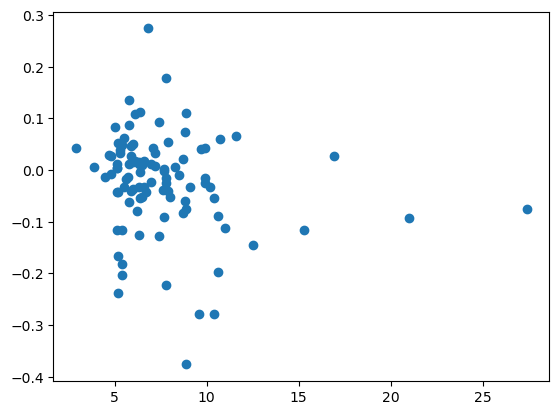

In [69]:
# Dependent variable.
y = quart_bert["Finbert_score"].values.reshape(-1, 1) 

# Independent variable.
X = quart_bert["Savings Ratio (%)"].values.reshape(-1, 1) 

# Check for linearity.
plt.scatter(X,y)

In [70]:
quart_bert.to_csv("quart_bert.csv", index=False)

In [71]:
# Specify the model
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

LinearRegression()

In [72]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# Fit the model with train data
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
# Predict the training set values.
y_pred = lr.predict(x_train)

# View the output.
y_pred

array([[-0.01299623],
       [-0.00934658],
       [-0.00529141],
       [-0.04503206],
       [-0.0097521 ],
       [-0.02597277],
       [-0.02637829],
       [-0.0146183 ],
       [-0.00894106],
       [-0.00123624],
       [-0.01907898],
       [-0.00772451],
       [-0.01907898],
       [-0.00853555],
       [-0.00245279],
       [-0.00448038],
       [-0.00610245],
       [-0.0146183 ],
       [-0.00853555],
       [-0.00772451],
       [-0.00407486],
       [-0.0048859 ],
       [-0.00407486],
       [-0.01056313],
       [-0.00529141],
       [-0.00813003],
       [-0.00650796],
       [-0.0121852 ],
       [-0.00650796],
       [-0.01421278],
       [-0.01989002],
       [-0.02313415],
       [-0.02597277],
       [-0.01867347],
       [-0.01421278],
       [-0.03367759],
       [-0.02313415],
       [-0.01867347],
       [-0.0097521 ],
       [-0.00204728],
       [-0.0219176 ],
       [-0.01015761],
       [-0.0243507 ],
       [-0.00366934],
       [-0.00894106],
       [-0

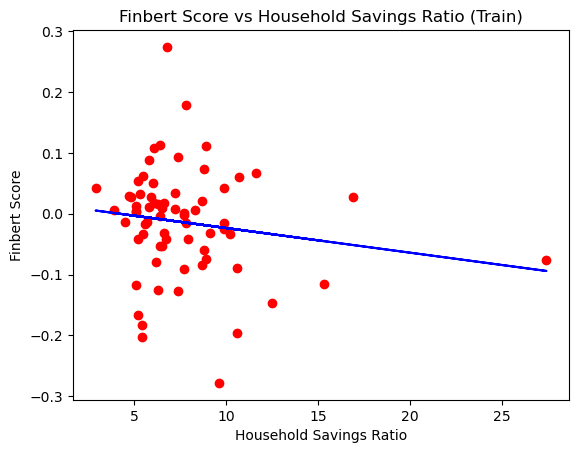

In [74]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'blue')
plt.title("Finbert Score vs Household Savings Ratio (Train)")
plt.xlabel("Household Savings Ratio")
plt.ylabel("Finbert Score")

plt.show()

In [75]:
# Evaluating the goodness of fit of the training data
# Print R-squared value of the train data.
print("R-squared value: ", lr.score(x_train, y_train)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.02472056275377965
Intercept value:  [0.01701201]
Coefficient value:  [[-0.00405517]]


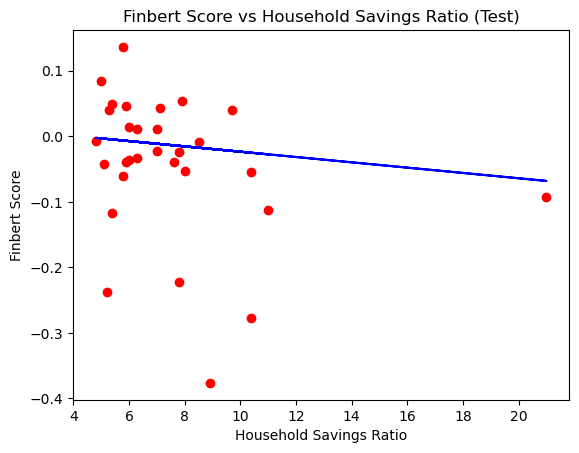

In [76]:
# Testing the model
# Predict the test set values.
y_pred_test = lr.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'blue')

# Set the title and legends for the graph.  
plt.title("Finbert Score vs Household Savings Ratio (Test)")
plt.xlabel("Household Savings Ratio")
plt.ylabel("Finbert Score")

# Print the graph. 
plt.show() 

In [77]:
# Print R-squared value of the test data.
print("R-squared value: ", lr.score(x_test, y_test)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  -0.03114532417989402
Intercept value:  [0.01701201]
Coefficient value:  [[-0.00405517]]


#### Using OLS method

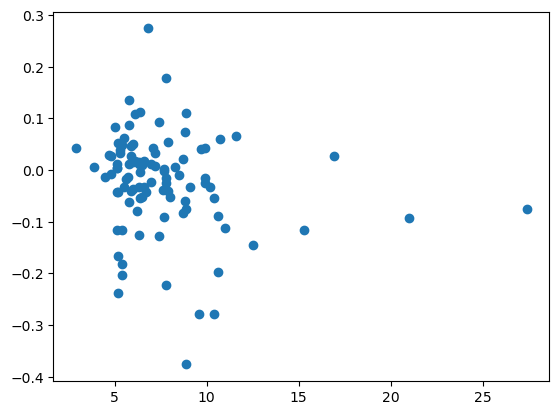

In [79]:
# Linear regression using OLS
# Dependent variable.
y = quart_bert['Finbert_score']

# Independent variable.
x = quart_bert['Savings Ratio (%)']

# Check for linearity.
plt.scatter(x,y)

In [80]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = quart_bert).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                    0.8760
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.679
Time:                        14:38:39   Log-Likelihood:                 124.16
No. Observations:                  98   AIC:                            -142.3
Df Residuals:                      45   BIC:                            -5.326
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0419      0.101      0.417      0.679      -0.161       0.245
x[T.3.9]      -0.0360      0.142     -0.253      0.802      -0.322       0.251
x[T.4.5]      -0.0555      0.142     -0.390      0.698      -0.342       0.231
x[T.4.7]      -0.0127      0.142     -0.089      0.929      -0.299       0.274
x[T.4.8]      -0.0322      0.123     -0.261      0.795      -0.280       0.216
x[T.5]         0.0418      0.142      0.294      0.770      -0.245       0.328
x[T.5.1]      -0.0699      0.110     -0.634      0.529      -0.292       0.152
x[T.5.2]      -0.1401      0.112     -1.246      0.219      -0.367       0.086
x[T.5.3]      -0.0061      0.123     -0.050      0.961      -0.254       0.242
x[T.5.4]      -0.1551      0.112     -1.379      0.175      -0.382       0.071
x[T.5.5]      -0.0272      0.123     -0.221      0.826      -0.275       0.221
x[T.5.6]      -0.0587      0.142     -0.413      0.682      -0.345       0.228
x[T.5.7]      -0.0553      0.142     -0.389      0.699      -0.342       0.231
x[T.5.8]       0.0017      0.112      0.015      0.988      -0.225       0.228
x[T.5.9]      -0.0306      0.116     -0.264      0.793      -0.265       0.203
x[T.6]        -0.0323      0.116     -0.278      0.782      -0.266       0.202
x[T.6.1]       0.0208      0.123      0.169      0.867      -0.227       0.269
x[T.6.2]      -0.1208      0.142     -0.849      0.400      -0.407       0.166
x[T.6.3]      -0.0747      0.112     -0.664      0.510      -0.301       0.152
x[T.6.4]      -0.0229      0.116     -0.197      0.845      -0.257       0.211
x[T.6.5]      -0.0635      0.123     -0.515      0.609      -0.312       0.185
x[T.6.6]      -0.0493      0.123     -0.400      0.691      -0.297       0.199
x[T.6.7]      -0.0843      0.142     -0.593      0.556      -0.371       0.202
x[T.6.8]       0.2322      0.142      1.633      0.110      -0.054       0.519
x[T.7]        -0.0475      0.123     -0.385      0.702      -0.296       0.201
x[T.7.1]       0.0012      0.142      0.009      0.993      -0.285       0.288
x[T.7.2]      -0.0214      0.123     -0.173      0.863      -0.269       0.227
x[T.7.4]      -0.0590      0.123     -0.479      0.634      -0.307       0.189
x[T.7.6]      -0.0810      0.142     -0.569      0.572      -0.367       0.206
x[T.7.7]      -0.0720      0.116     -0.620      0.539      -0.306       0.162
x[T.7.8]      -0.0629      0.112     -0.560      0.579      -0.289       0.164
x[T.7.9]      -0.0355      0.123     -0.289      0.774      -0.284       0.213
x[T.8]        -0.0948      0.142     -0.667      0.508      -0.381       0.192
x[T.8.3]      -0.0357      0.142     -0.251      0.803      -0.322       0.251
x[T.8.5]      -0.0508      0.142     -0.357      0.723      -0.337       0.236
x[T.8.7]      -0.0735      0.123     -0.596      0.554      -0.322       0.175
x[

In [81]:
# Pearson's correlation
correlation = quart_bert['Savings Ratio (%)'].corr(quart_bert['Finbert_score'])
print("Pearson's correlation:", correlation)

Pearson's correlation: -0.18760309703033537


#### P value from Pearsons Coefficient

In [83]:
# Calculate Pearson's correlation coefficient and the p-value
x = quart_bert['Savings Ratio (%)']
y = quart_bert['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.18760309703033534
p-value: 0.06434129114518716


### Finbert Score and Arrears

In [85]:
# Using the dataframe with information from 2007 to 2022
quartbert_filtered.head()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
34,2007Q1,0.111425,8.9,2007.0,Q1,0.763,0.730,0.232,0.089,0.104,0.141,2.059,6472.0,0
35,2007Q2,0.177961,7.8,2007.0,Q2,0.762,0.744,0.239,0.090,0.103,0.142,2.079,6464.0,0
36,2007Q3,0.033574,7.2,2007.0,Q3,0.765,0.751,0.263,0.094,0.111,0.148,2.132,6838.0,0
37,2007Q4,0.050853,6,2007.0,Q4,0.811,0.790,0.269,0.103,0.119,0.170,2.262,8135.0,0
38,2008Q1,-0.166240,5.2,2008.0,Q1,0.837,0.846,0.290,0.108,0.130,0.203,2.415,9174.0,0


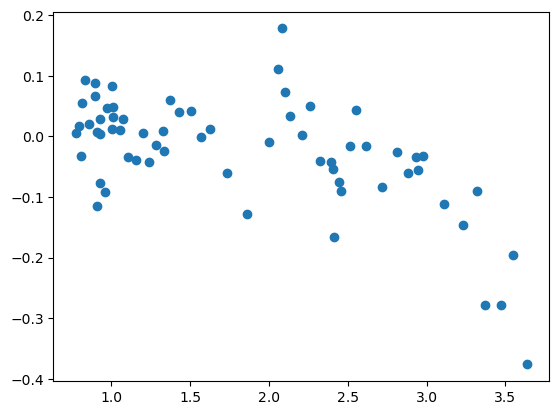

In [86]:
# Dependent variable.
y = quartbert_filtered["Finbert_score"].values.reshape(-1, 1) 

# Independent variable.
X = quartbert_filtered["TOTAL (%)"].values.reshape(-1, 1) 

# Check for linearity.
plt.scatter(X,y)

In [87]:
# Specify the model
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

LinearRegression()

In [88]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# Fit the model with train data
lr.fit(x_train, y_train)

LinearRegression()

In [89]:
# Predict the training set values.
y_pred = lr.predict(x_train)

# View the output.
y_pred

array([[-0.08937636],
       [-0.00433086],
       [-0.05870519],
       [ 0.02544698],
       [-0.07055677],
       [ 0.03116432],
       [ 0.01639452],
       [ 0.0298541 ],
       [-0.01177532],
       [-0.01808822],
       [ 0.03539278],
       [ 0.03658389],
       [-0.09038881],
       [-0.04012382],
       [-0.04637717],
       [-0.05751408],
       [ 0.02508964],
       [-0.11266263],
       [-0.00808287],
       [ 0.03164077],
       [ 0.0251492 ],
       [ 0.00597227],
       [-0.02583046],
       [ 0.02103986],
       [ 0.02550653],
       [-0.03869448],
       [-0.06055142],
       [-0.04185093],
       [ 0.03896612],
       [ 0.01157051],
       [ 0.00347093],
       [-0.05816919],
       [ 0.03009232],
       [-0.12165554],
       [-0.06114697],
       [-0.076691  ],
       [ 0.03700078],
       [-0.06472031],
       [-0.11546175],
       [ 0.01919363],
       [-0.09229459],
       [-0.03398959],
       [ 0.03164077],
       [ 0.00859272]])

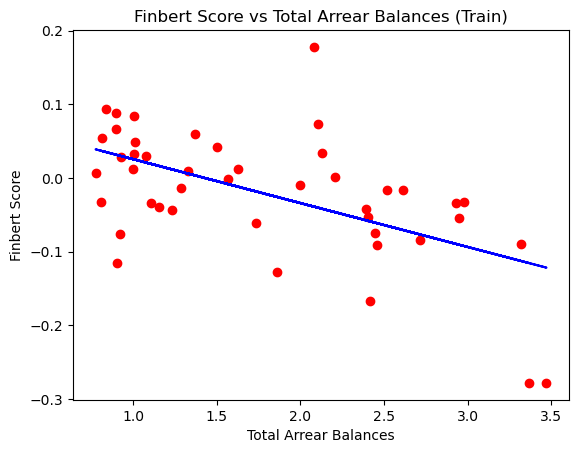

In [90]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'blue')
plt.title("Finbert Score vs Total Arrear Balances (Train)")
plt.xlabel("Total Arrear Balances")
plt.ylabel("Finbert Score")

plt.show()

In [91]:
# Print R-squared value of the train data.
print("R-squared value: ", lr.score(x_train, y_train)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.31403184233431825
Intercept value:  [0.08512176]
Coefficient value:  [[-0.05955567]]


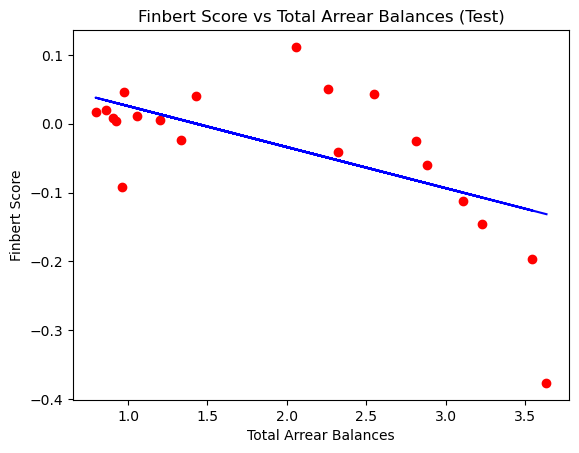

In [92]:
# Testing the model
# Predict the test set values.
y_pred_test = lr.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'blue')

# Set the title and legends for the graph.  
plt.title("Finbert Score vs Total Arrear Balances (Test)")
plt.xlabel("Total Arrear Balances")
plt.ylabel("Finbert Score")

# Print the graph. 
plt.show() 

In [93]:
# Print R-squared value of the test data.
print("R-squared value: ", lr.score(x_test, y_test)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.40320776602477515
Intercept value:  [0.08512176]
Coefficient value:  [[-0.05955567]]


#### Using OLS

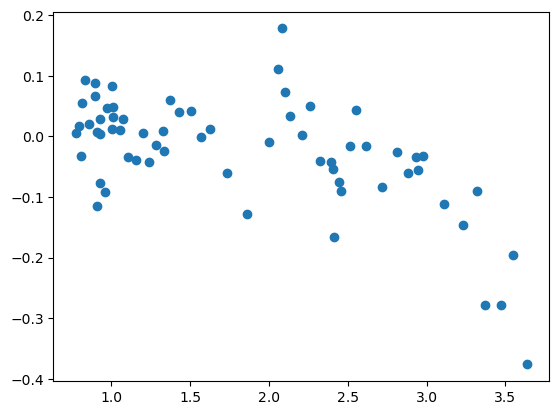

In [95]:
# Dependent variable.
y = quartbert_filtered['Finbert_score']

# Independent variable.
x = quartbert_filtered['TOTAL (%)']

# Check for linearity.
plt.scatter(x,y)

In [96]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = quartbert_filtered).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     34.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.96e-07
Time:                        14:38:40   Log-Likelihood:                 75.144
No. Observations:                  64   AIC:                            -146.3
Df Residuals:                      62   BIC:                            -142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0913      0.022      4.134      0.000       0.047       0.135
x             -0.0638      0.011     -5.854      0.000      -0.086      -0.042
==============================================================================
Omnibus:                        5.587   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.184
Skew:                          -0.328   Prob(JB):                       0.0454
Kurtosis:                       4.374   Cond. No.                         5.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Pearson's correlation
correlation = quartbert_filtered['TOTAL (%)'].corr(quartbert_filtered['Finbert_score'])
print("Pearson's correlation:", correlation)

Pearson's correlation: -0.5966144509133349


#### P value using Pearson's coefficient or correlation

In [99]:
# Calculate Pearson's correlation coefficient and the p-value
x = quartbert_filtered['TOTAL (%)']
y = quartbert_filtered['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.5966144509133349
p-value: 1.9647025242633678e-07


### Finbert Score and Mortgage Defaults (Repossessions)

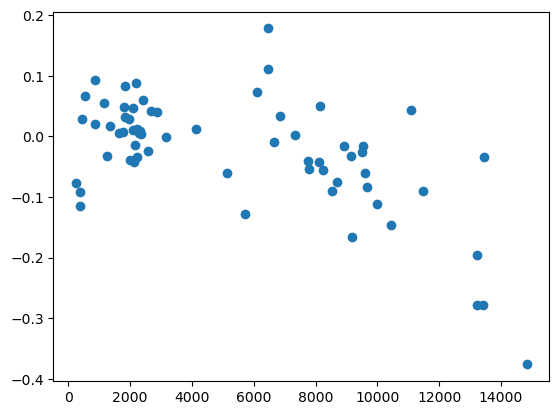

In [101]:
# Dependent variable.
y = quartbert_filtered["Finbert_score"].values.reshape(-1, 1) 

# Independent variable.
X = quartbert_filtered["New Possessions (Units)"].values.reshape(-1, 1) 

# Check for linearity.
plt.scatter(X,y)

In [102]:
# Specify the model
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

LinearRegression()

In [103]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# Fit the model with train data
lr.fit(x_train, y_train)

LinearRegression()

In [104]:
# Predict the training set values.
y_pred = lr.predict(x_train)

# View the output.
y_pred

array([[-0.12483585],
       [ 0.00987719],
       [-0.07130517],
       [ 0.02016387],
       [-0.06818422],
       [ 0.03850262],
       [ 0.01847855],
       [ 0.03779104],
       [-0.00838666],
       [-0.02104526],
       [ 0.03263522],
       [ 0.02890255],
       [-0.05972018],
       [-0.03315458],
       [-0.04826002],
       [-0.05800989],
       [ 0.02063826],
       [-0.10013035],
       [ 0.00381005],
       [ 0.03649272],
       [ 0.0203761 ],
       [ 0.01442131],
       [-0.02809863],
       [ 0.01884058],
       [ 0.01564472],
       [-0.03747399],
       [-0.06532542],
       [-0.04214294],
       [ 0.02262319],
       [ 0.01653108],
       [ 0.0130356 ],
       [-0.05405252],
       [ 0.04011304],
       [-0.12427408],
       [-0.06315323],
       [-0.07754709],
       [ 0.02771659],
       [-0.0757619 ],
       [-0.12201451],
       [ 0.01532014],
       [-0.07080582],
       [-0.03989585],
       [ 0.01594434],
       [ 0.01644369]])

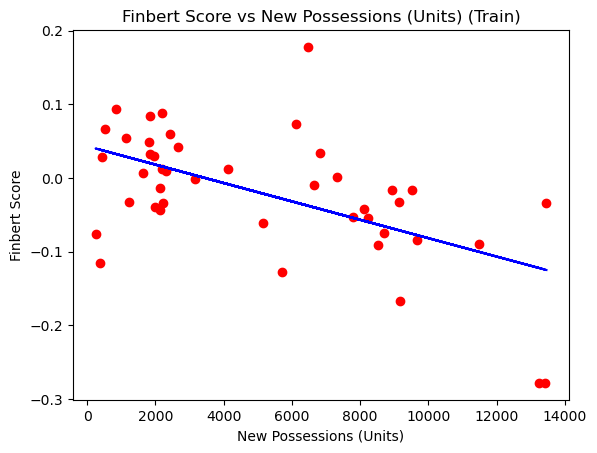

In [105]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'blue')
plt.title("Finbert Score vs New Possessions (Units) (Train)")
plt.xlabel("New Possessions (Units)")
plt.ylabel("Finbert Score")

plt.show()

In [106]:
# Evaluating the goodness of fit of the training data
# Print R-squared value of the train data.
print("R-squared value: ", lr.score(x_train, y_train)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)


R-squared value:  0.31763150723172795
Intercept value:  [0.04322151]
Coefficient value:  [[-1.24838332e-05]]


In [107]:
# Testing the model
# Predict the test set values.
y_pred_test = lr.predict(x_test) 

R-squared value:  0.3695375319686053


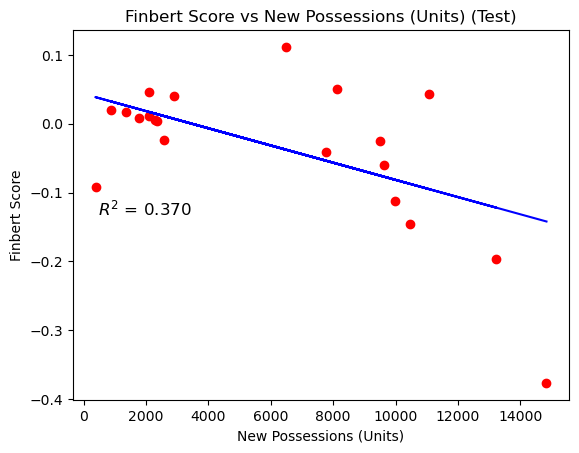

In [108]:
# Calculate and print the R-squared value
r_squared = lr.score(x_test, y_test)
print("R-squared value: ", r_squared)

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'blue')

# Add R-squared value as text on the plot
plt.text(0.05, 0.5, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, color='black', fontsize=12)

# Set the title and legends for the graph.  
plt.title("Finbert Score vs New Possessions (Units) (Test)")
plt.xlabel("New Possessions (Units)")
plt.ylabel("Finbert Score")

# Print the graph. 
plt.show()

In [109]:
# Print R-squared value of the test data.
print("R-squared value: ", lr.score(x_test, y_test)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.3695375319686053
Intercept value:  [0.04322151]
Coefficient value:  [[-1.24838332e-05]]


#### Using OLS

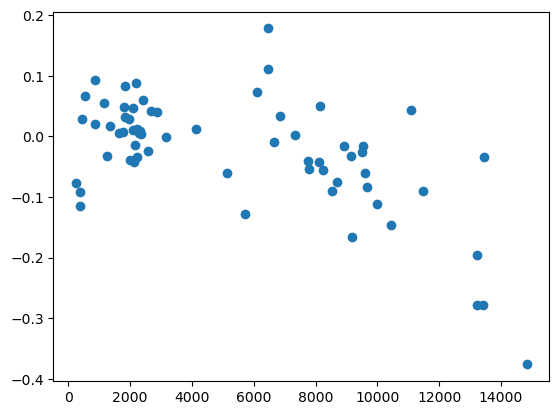

In [111]:
# Dependent variable.
y = quartbert_filtered['Finbert_score']

# Independent variable.
x = quartbert_filtered['New Possessions (Units)']

# Check for linearity.
plt.scatter(x,y)

In [112]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = quartbert_filtered).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     32.52
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.52e-07
Time:                        14:38:42   Log-Likelihood:                 74.560
No. Observations:                  64   AIC:                            -145.1
Df Residuals:                      62   BIC:                            -140.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0463      0.016      2.930      0.005       0.015       0.078
x          -1.331e-05   2.33e-06     -5.703      0.000    -1.8e-05   -8.65e-06
==============================================================================
Omnibus:                        4.066   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                4.023
Skew:                          -0.216   Prob(JB):                        0.134
Kurtosis:                       4.150   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# Pearson's correlation
correlation = quartbert_filtered['New Possessions (Units)'].corr(quartbert_filtered['Finbert_score'])
print("Pearson's correlation:", correlation)

Pearson's correlation: -0.5865755166543987


#### P value using Pearson's Correlation 

In [115]:
# Calculate Pearson's correlation coefficient and the p-value
x = quartbert_filtered['New Possessions (Units)']
y = quartbert_filtered['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.5865755166543984
p-value: 3.516565398598846e-07


In [116]:
# Calculate Calculate Pearson's correlation coefficient and the p-value from 2007 - 2010
# Filter the dataframe for the desired date range
gfc = quartbert_filtered[(quartbert_filtered['Quarter'] >= '2007Q1') & (quartbert_filtered['Quarter'] <= '2010Q4')]

# Calculate Pearson's correlation coefficient and the p-value
x = gfc['New Possessions (Units)']
y = gfc['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.8110573243821632
p-value: 0.00013761934365826055


In [117]:
# Calculate Calculate Pearson's correlation coefficient and the p-value from 2018 - 2022
# Filter the dataframe for the desired date range
lastfive = quartbert_filtered[(quartbert_filtered['Quarter'] >= '2018Q1') & (quartbert_filtered['Quarter'] <= '2022Q4')]

# Calculate Pearson's correlation coefficient and the p-value
x = lastfive['New Possessions (Units)']
y = lastfive['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.45364469329585233
p-value: 0.044537811387013106


### Finbert Score and QE

In [119]:
# Creating a subset of the dataframe to cover the period of 2009Q2 to 2022Q4 to include when QE started
qefilt = quartbert_filtered[(quartbert_filtered['Quarter'] >= '2009Q2') & (quartbert_filtered['Quarter'] <= '2022Q4')].reset_index(drop=True)
qefilt.head()

,Quarter,Finbert_score,Savings Ratio (%),Year,quarter,1.5 < 2.5 % in arrears,2.5 < 5.0 % in arrears,5.0 < 7.5 % in arrears,7.5 < 10 % in arrears,10 % or more in arrears,In possession (%),TOTAL (%),New Possessions (Units),Total Asset Purchases (GBP million)
0,2009Q2,-0.196440,10.6,2009.0,Q2,1.072,1.280,0.496,0.195,0.210,0.294,3.547,13225.0,99094
1,2009Q3,-0.277979,10.4,2009.0,Q3,1.013,1.243,0.517,0.209,0.223,0.267,3.472,13417.0,153770
2,2009Q4,-0.089575,10.6,2009.0,Q4,0.955,1.177,0.512,0.216,0.238,0.223,3.321,11483.0,190053
3,2010Q1,-0.146002,12.5,2010.0,Q1,0.915,1.122,0.502,0.223,0.258,0.210,3.229,10447.0,199667
4,2010Q2,-0.112237,11,2010.0,Q2,0.874,1.063,0.478,0.225,0.270,0.203,3.113,9990.0,199527


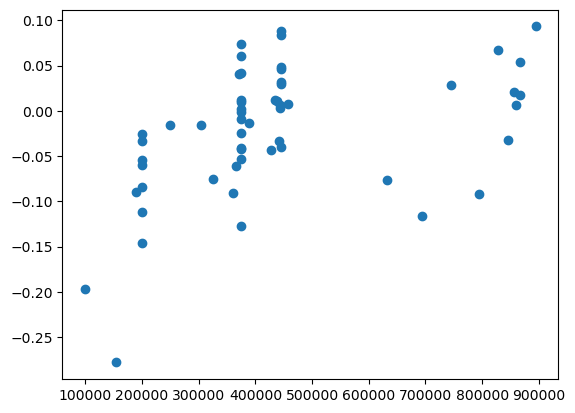

In [120]:
# Dependent variable.
y = qefilt["Finbert_score"].values.reshape(-1, 1) 

# Independent variable.
X = qefilt["Total Asset Purchases (GBP million)"].values.reshape(-1, 1) 

# Check for linearity.
plt.scatter(X,y)

In [121]:
# Specify the model
lr = LinearRegression()

# Fit the model
lr.fit(X, y)

LinearRegression()

In [122]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# Fit the model with train data
lr.fit(x_train, y_train)

LinearRegression()

In [123]:
# Predict the training set values.
y_pred = lr.predict(x_train)

# View the output.
y_pred

array([[-0.06113656],
       [ 0.03177591],
       [-0.03372957],
       [ 0.02409342],
       [ 0.01622341],
       [ 0.04214534],
       [-0.0337166 ],
       [-0.06120704],
       [-0.03371738],
       [-0.03372567],
       [-0.02546122],
       [-0.02280538],
       [-0.03439217],
       [-0.04488318],
       [-0.07683143],
       [ 0.03700805],
       [-0.02280069],
       [-0.03160928],
       [-0.02286148],
       [-0.0682871 ],
       [-0.03522916],
       [-0.06261708],
       [ 0.04749219],
       [-0.02428387],
       [-0.02394163],
       [-0.03372567],
       [ 0.00655814],
       [-0.05326155],
       [-0.03372895],
       [-0.03371645],
       [ 0.03987315],
       [-0.03372457],
       [-0.06117438],
       [-0.02280569],
       [-0.0337191 ],
       [-0.03372957],
       [ 0.04314705],
       [-0.02284382]])

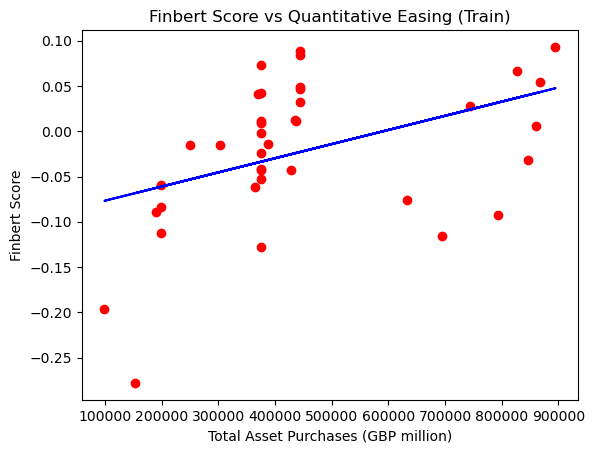

In [124]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'blue')
plt.title("Finbert Score vs Quantitative Easing (Train)")
plt.xlabel("Total Asset Purchases (GBP million)")
plt.ylabel("Finbert Score")

plt.show()

In [125]:
# Evaluating the goodness of fit of the training data
# Print R-squared value of the train data.
print("R-squared value: ", lr.score(x_train, y_train)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.18190240385063505
Intercept value:  [-0.09231705]
Coefficient value:  [[1.56272032e-07]]


In [126]:
# Testing the model
# Predict the test set values.
y_pred_test = lr.predict(x_test) 

R-squared value:  0.24095395156628152


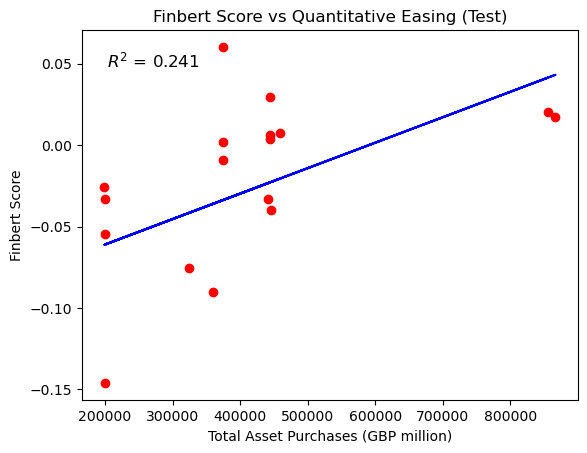

In [127]:
r_squared = lr.score(x_test, y_test)
print("R-squared value: ", r_squared)

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'blue')

# Add R-squared value as text on the plot
plt.text(0.05, 0.9, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, color='black', fontsize=12)

# Set the title and legends for the graph.  
plt.title("Finbert Score vs Quantitative Easing (Test)")
plt.xlabel("Total Asset Purchases (GBP million)")
plt.ylabel("Finbert Score")

# Print the graph. 
plt.show()

In [128]:
# Print R-squared value of the test data.
print("R-squared value: ", lr.score(x_test, y_test)) 
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

R-squared value:  0.24095395156628152
Intercept value:  [-0.09231705]
Coefficient value:  [[1.56272032e-07]]


#### Using OLS

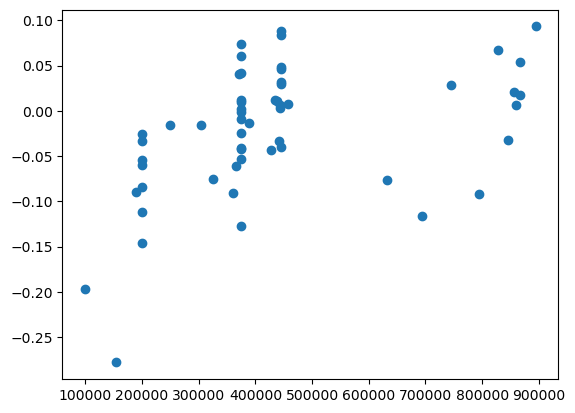

In [130]:
# Dependent variable.
y = qefilt['Finbert_score']

# Independent variable.
x = qefilt['Total Asset Purchases (GBP million)']

# Check for linearity.
plt.scatter(x,y)

In [131]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = qefilt).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1.830
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.347
Time:                        14:38:44   Log-Likelihood:                 163.17
No. Observations:                  55   AIC:                            -222.3
Df Residuals:                       3   BIC:                            -118.0
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1964      0.053     -3.683      0.035      -0.366      -0.027
x[T.153770]    -0.0815      0.075     -1.081      0.359      -0.322       0.158
x[T.190053]     0.1069      0.075      1.417      0.252      -0.133       0.347
x[T.199076]     0.1128      0.075      1.496      0.232      -0.127       0.353
x[T.199144]     0.1709      0.075      2.266      0.108      -0.069       0.411
x[T.199285]     0.1365      0.075      1.810      0.168      -0.103       0.377
x[T.199398]     0.1416      0.075      1.877      0.157      -0.098       0.382
x[T.199500]     0.1633      0.075      2.165      0.119      -0.077       0.403
x[T.199527]     0.0842      0.075      1.116      0.346      -0.156       0.324
x[T.199667]     0.0504      0.075      0.669      0.552      -0.190       0.290
x[T.249920]     0.1808      0.075      2.398      0.096      -0.059       0.421
x[T.303534]     0.1807      0.075      2.396      0.096      -0.059       0.421
x[T.324934]     0.1212      0.075      1.608      0.206      -0.119       0.361
x[T.359825]     0.1062      0.075      1.408      0.254      -0.134       0.346
x[T.365311]     0.1354      0.075      1.795      0.170      -0.105       0.375
x[T.370667]     0.2373      0.075      3.146      0.051      -0.003       0.477
x[T.374900]     0.2567      0.075      3.403      0.042       0.017       0.497
x[T.374907]     0.1891      0.065      2.894      0.063      -0.019       0.397
x[T.374911]     0.2081      0.075      2.759      0.070      -0.032       0.448
x[T.374932]     0.2164      0.065      3.314      0.045       0.009       0.424
x[T.374939]     0.1283      0.065      1.965      0.144      -0.080       0.336
x[T.374974]     0.1433      0.075      1.900      0.154      -0.097       0.383
x[T.374984]     0.1983      0.075      2.629      0.078      -0.042       0.438
x[T.374985]     0.1550      0.075      2.055      0.132      -0.085       0.395
x[T.374990]     0.1541      0.075      2.043      0.134      -0.086       0.394
x[T.374991]     0.2700      0.075      3.580      0.037       0.030       0.510
x[T.388475]     0.1829      0.075      2.425      0.094      -0.057       0.423
x[T.427817]     0.1537      0.075      2.037      0.134      -0.086       0.394
x[T.435351]     0.2085      0.075      2.764      0.070      -0.032       0.448
x[T.437541]     0.2073      0.075      2.748      0.071      -0.033       0.447
x[T.440689]     0.1631      0.075      2.163      0.119      -0.077       0.403
x[T.443563]     0.2000      0.075      2.651      0.077      -0.040       0.440
x[T.443777]     0.2024      0.075      2.683      0.075      -0.038       0.442
x[T.444453]     0.2429      0.075      3.221      0.049       0.003       0.483
x[T.444566]     0.2802      0.075      3.715      0.034       0.040       0.520
x[T.444810]     0.2846      0.075      3.77

In [132]:
# Pearson's correlation
correlation = qefilt['Total Asset Purchases (GBP million)'].corr(qefilt['Finbert_score'])
print("Pearson's correlation:", correlation)

Pearson's correlation: 0.43806931033866153


#### P value using Pearson's Coefficient of correlation

In [134]:
# Calculate Pearson's correlation coefficient and the p-value
x = qefilt['Total Asset Purchases (GBP million)']
y = qefilt['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.4380693103386616
p-value: 0.0008229028198334177


In [135]:
# Calculate Pearson's correlation coefficient and the p-value for GFC 2007-2010
# QE started only in 2009Q2 hence creating a subset of dataframe from 2009Q2 to 2010Q4
gfc_qe = qefilt[(qefilt['Quarter'] >= '2009Q2') & (qefilt['Quarter'] <= '2010Q4')]

# Calculate Pearson's correlation coefficient and the p-value
x = gfc_qe['Total Asset Purchases (GBP million)']
y = gfc_qe['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.6658970800351933
p-value: 0.10248122862877962


In [136]:
# Calculate Pearson's correlation coefficient and the p-value for last five years of the dataset
x = lastfive['Total Asset Purchases (GBP million)']
y = lastfive['Finbert_score']

# Calculate Pearson's correlation coefficient and the p-value
pearson_corr, p_value = pearsonr(x, y)

print("Pearson's correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.14919875754612927
p-value: 0.5301325161265504
